Para rodar, é necessário:
- Criar pastas com os seguintes nomes: dados, img e pdfs
- Colocar os dados necessários na pasta 'dados' (caged.csv, caged_nordeste.csv, cagedest_rn_saldo_mensal.csv, porte_mensal_rn_excel.xlsx e cnaes_subclasses.csv)
    - Obs.: rodar 'build_caged.R' para obter esses dados.
- Instalar as bibliotecas que estão comentadas abaixo

In [13]:
# !pip install weasyprint
# !pip install geobr
# !pip install adjustText

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import weasyprint
from pathlib import Path
import matplotlib.dates as mdates
import geopandas as gpd
from shapely.geometry import box
import geobr
import matplotlib.pyplot as plt
from adjustText import adjust_text
from datetime import datetime
from pathlib import Path

In [15]:
pd.set_option('display.max_columns', None)

# Dados

In [16]:
data = pd.read_csv("dados/caged.csv")

In [17]:
data.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente
0,202001,2,24,240810,G,4511102,-1,521110,101,6,42.0,4400.0,6,1,0,1,31,0,0,0,103900.0,2,0,1,202001,0,5,103900.0,NaN,NaN,0,-1,NaN,Comércio,Micro,2020-01-01,"Comércio a Varejo de Automóveis, Camionetas e ...",Natal,Vendedor de Comercio Varejista,Não
1,202001,2,24,240810,Q,8630502,1,514320,101,7,36.0,2000.0,3,3,0,1,20,0,0,1,106078.0,8,0,1,202001,0,5,106078.0,NaN,NaN,1,0,NaN,Serviços,Média,2020-01-01,Atividade Médica Ambulatorial com Recursos par...,Natal,Faxineiro (Desativado em 2010),Não
2,202001,2,24,240810,N,8111700,-1,517410,101,3,46.0,3000.0,2,1,0,1,31,0,0,0,96500.0,10,0,1,202001,0,5,96500.0,NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,"Serviços Combinados para Apoio a Edifícios, Ex...",Natal,Porteiro de Edificios,Não
3,202001,2,24,241420,I,5510801,-1,422105,999,7,23.0,4400.0,3,3,0,1,31,0,9,0,107000.0,3,0,2,202001,0,99,NaN,NaN,NaN,0,-1,NaN,Serviços,Micro,2020-01-01,Hotéis,Tibau do Sul,"Recepcionista, em Geral",Não Identificado
4,202001,2,24,240800,N,8299799,1,524105,101,7,35.0,4400.0,3,3,0,1,20,0,0,0,103900.0,5,0,1,202001,0,5,103900.0,NaN,NaN,1,0,NaN,Serviços,Pequena,2020-01-01,Outras Atividades de Serviços Prestados Princi...,Mossoro,Vendedor em Domicilio,Não


In [41]:
data['unidadesaláriocódigo'].unique()

array([ 5, 99,  1,  7,  4,  6,  3,  2])

In [18]:
data.columns

Index(['competênciamov', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'origemdainformação', 'competênciadec',
       'indicadordeforadoprazo', 'unidadesaláriocódigo', 'valorsaláriofixo',
       'competênciaexc', 'indicadordeexclusão', 'admitidos', 'desligados',
       'NI', 'grande_grupamento', 'porte', 'data', 'cnae_subclasse', 'mun',
       'ocupacao', 'trab_intermitente'],
      dtype='object')

In [19]:
data.describe()

,competênciamov,região,uf,município,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI
count,1.889944e+06,1889944.0,1889944.0,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889753e+06,1.886703e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.884442e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.889944e+06,1.845610e+06,5617.000000,5617.0,1.889944e+06,1.889944e+06,0.0
mean,2.022260e+05,2.0,24.0,2.406994e+05,5.050991e+06,5.677311e-02,5.475838e+05,1.170694e+02,6.939728e+00,3.283050e+01,4.029230e+03,3.218502e+00,1.667057e+00,3.036069e-02,1.160605e+00,5.906614e+01,1.493960e-02,1.751385e-01,1.634525e-01,2.084287e+05,5.030586e+00,3.003581e-02,1.019692e+00,2.022272e+05,4.833265e-02,7.097907e+00,1.368477e+05,202223.051095,1.0,5.285098e-01,-4.714902e-01,NaN
std,1.392078e+02,0.0,0.0,3.024887e+02,2.483380e+06,9.983874e-01,1.719183e+05,1.179880e+02,5.590243e+00,1.035865e+01,1.034402e+03,1.684586e+00,9.429875e-01,3.402462e-01,6.652613e-01,3.268520e+01,2.241292e-01,1.187510e+00,1.109958e+00,1.654998e+06,2.857878e+00,1.706859e-01,1.515990e-01,1.384144e+02,2.144682e-01,1.452791e+01,7.286891e+05,115.417837,0.0,4.991867e-01,4.991867e-01,NaN
min,2.020010e+05,2.0,24.0,2.400100e+05,1.113010e+05,-1.000000e+00,1.010500e+04,1.010000e+02,1.000000e+00,1.400000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.020010e+05,0.000000e+00,1.000000e+00,-5.195000e+04,202004.000000,1.0,0.000000e+00,-1.000000e+00,NaN
25%,2.021070e+05,2.0,24.0,2.404700e+05,4.120400e+06,-1.000000e+00,4.211250e+05,1.010000e+02,7.000000e+00,2.400000e+01,4.400000e+03,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+05,3.000000e+00,0.000000e+00,1.000000e+00,2.021070e+05,0.000000e+00,5.000000e+00,1.100000e+05,202109.000000,1.0,0.000000e+00,-1.000000e+00,NaN
50%,2.022100e+05,2.0,24.0,2.408100e+05,4.744001e+06,1.000000e+00,5.191100e+05,1.010000e+02,7.000000e+00,3.100000e+01,4.400000e+03,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.320000e+05,5.000000e+00,0.000000e+00,1.000000e+00,2.022100e+05,0.000000e+00,5.000000e+00,1.302000e+05,202209.000000,1.0,1.000000e+00,0.000000e+00,NaN
75%,2.023120e+05,2.0,24.0,2.408100e+05,7.711000e+06,1.000000e+00,7.155050e+05,1.010000e+02,7.000000e+00,3.900000e+01,4.400000e+03,3.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,9.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.470160e+05,7.000000e+00,0.000000e+00,1.000000e+00,2.023120e+05,0.000000e+00,5.000000e+00,1.455000e+05,202309.000000,1.0,1.000000e+00,0.000000e+00,NaN
max,2.024120e+05,2.0,24.0,2.415000e+05,9.999999e+06,1.000000e+00,9.999990e+05,9.990000e+02,9.900000e+01,9.300000e+01,9.900000e+03,9.000000e+00,9.000000e+00,9.000000e+00,4.000000e+00,9.800000e+01,6.000000e+00,9.000000e+00,9.000000e+00,4.414789e+08,1.000000e+01,1.000000e+00,3.000000e+00,2.024120e+05,1.000000e+00,9.900000e+01,4.414789e+08,202412.000000,1.0,1.000000e+00,0.000000e+00,NaN


In [20]:
subclasses = pd.read_csv("dados/cnaes_subclasses.csv",encoding='latin1', sep=';')

In [21]:
subclasses['num_cnae'] = subclasses['num_cnae'].fillna(0).astype(int)

In [22]:
subclasses.head()

,CNAE.CNAE_SUBCLASSE,num_cnae,desc_cnae
0,"7722500 - Aluguel de fitas de vídeo, DVDs e si...",7722500,"Aluguel de fitas de vídeo, DVDs e similares"
1,8630503 - Atividade médica ambulatorial restri...,8630503,Atividade médica ambulatorial restrita a consu...
2,133402 - Cultivo de banana,133402,Cultivo de banana
3,1321900 - Tecelagem de fios de algodão,1321900,Tecelagem de fios de algodão
4,8413200 - Regulação das atividades econômicas,8413200,Regulação das atividades econômicas


In [23]:
# Realizar o merge com base na correspondência entre 'num_cnae' e 'subclasse'
data = data.merge(subclasses[['num_cnae', 'desc_cnae']], 
                  how='left', 
                  left_on='subclasse', 
                  right_on='num_cnae')

In [24]:
data.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente,num_cnae,desc_cnae
0,202001,2,24,240810,G,4511102,-1,521110,101,6,42.0,4400.0,6,1,0,1,31,0,0,0,103900.0,2,0,1,202001,0,5,103900.0,NaN,NaN,0,-1,NaN,Comércio,Micro,2020-01-01,"Comércio a Varejo de Automóveis, Camionetas e ...",Natal,Vendedor de Comercio Varejista,Não,4511102.0,"Comércio a varejo de automóveis, camionetas e ..."
1,202001,2,24,240810,Q,8630502,1,514320,101,7,36.0,2000.0,3,3,0,1,20,0,0,1,106078.0,8,0,1,202001,0,5,106078.0,NaN,NaN,1,0,NaN,Serviços,Média,2020-01-01,Atividade Médica Ambulatorial com Recursos par...,Natal,Faxineiro (Desativado em 2010),Não,8630502.0,Atividade médica ambulatorial com recursos par...
2,202001,2,24,240810,N,8111700,-1,517410,101,3,46.0,3000.0,2,1,0,1,31,0,0,0,96500.0,10,0,1,202001,0,5,96500.0,NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,"Serviços Combinados para Apoio a Edifícios, Ex...",Natal,Porteiro de Edificios,Não,8111700.0,"Serviços combinados para apoio a edifícios, ex..."
3,202001,2,24,241420,I,5510801,-1,422105,999,7,23.0,4400.0,3,3,0,1,31,0,9,0,107000.0,3,0,2,202001,0,99,NaN,NaN,NaN,0,-1,NaN,Serviços,Micro,2020-01-01,Hotéis,Tibau do Sul,"Recepcionista, em Geral",Não Identificado,5510801.0,Hotéis
4,202001,2,24,240800,N,8299799,1,524105,101,7,35.0,4400.0,3,3,0,1,20,0,0,0,103900.0,5,0,1,202001,0,5,103900.0,NaN,NaN,1,0,NaN,Serviços,Pequena,2020-01-01,Outras Atividades de Serviços Prestados Princi...,Mossoro,Vendedor em Domicilio,Não,8299799.0,Outras atividades de serviços prestados princi...


In [25]:
data.shape

(1889944, 42)

In [26]:
data.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente,num_cnae,desc_cnae
0,202001,2,24,240810,G,4511102,-1,521110,101,6,42.0,4400.0,6,1,0,1,31,0,0,0,103900.0,2,0,1,202001,0,5,103900.0,NaN,NaN,0,-1,NaN,Comércio,Micro,2020-01-01,"Comércio a Varejo de Automóveis, Camionetas e ...",Natal,Vendedor de Comercio Varejista,Não,4511102.0,"Comércio a varejo de automóveis, camionetas e ..."
1,202001,2,24,240810,Q,8630502,1,514320,101,7,36.0,2000.0,3,3,0,1,20,0,0,1,106078.0,8,0,1,202001,0,5,106078.0,NaN,NaN,1,0,NaN,Serviços,Média,2020-01-01,Atividade Médica Ambulatorial com Recursos par...,Natal,Faxineiro (Desativado em 2010),Não,8630502.0,Atividade médica ambulatorial com recursos par...
2,202001,2,24,240810,N,8111700,-1,517410,101,3,46.0,3000.0,2,1,0,1,31,0,0,0,96500.0,10,0,1,202001,0,5,96500.0,NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,"Serviços Combinados para Apoio a Edifícios, Ex...",Natal,Porteiro de Edificios,Não,8111700.0,"Serviços combinados para apoio a edifícios, ex..."
3,202001,2,24,241420,I,5510801,-1,422105,999,7,23.0,4400.0,3,3,0,1,31,0,9,0,107000.0,3,0,2,202001,0,99,NaN,NaN,NaN,0,-1,NaN,Serviços,Micro,2020-01-01,Hotéis,Tibau do Sul,"Recepcionista, em Geral",Não Identificado,5510801.0,Hotéis
4,202001,2,24,240800,N,8299799,1,524105,101,7,35.0,4400.0,3,3,0,1,20,0,0,0,103900.0,5,0,1,202001,0,5,103900.0,NaN,NaN,1,0,NaN,Serviços,Pequena,2020-01-01,Outras Atividades de Serviços Prestados Princi...,Mossoro,Vendedor em Domicilio,Não,8299799.0,Outras atividades de serviços prestados princi...


In [39]:
data['salario_fixed'] = data['salário']/1000

In [40]:
data.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente,num_cnae,desc_cnae,salario_fixed
0,202001,2,24,240810,G,4511102,-1,521110,101,6,42.0,4400.0,6,1,0,1,31,0,0,0,103900.0,2,0,1,202001,0,5,103900.0,NaN,NaN,0,-1,NaN,Comércio,Micro,2020-01-01,"Comércio a Varejo de Automóveis, Camionetas e ...",Natal,Vendedor de Comercio Varejista,Não,4511102.0,"Comércio a varejo de automóveis, camionetas e ...",103.900
1,202001,2,24,240810,Q,8630502,1,514320,101,7,36.0,2000.0,3,3,0,1,20,0,0,1,106078.0,8,0,1,202001,0,5,106078.0,NaN,NaN,1,0,NaN,Serviços,Média,2020-01-01,Atividade Médica Ambulatorial com Recursos par...,Natal,Faxineiro (Desativado em 2010),Não,8630502.0,Atividade médica ambulatorial com recursos par...,106.078
2,202001,2,24,240810,N,8111700,-1,517410,101,3,46.0,3000.0,2,1,0,1,31,0,0,0,96500.0,10,0,1,202001,0,5,96500.0,NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,"Serviços Combinados para Apoio a Edifícios, Ex...",Natal,Porteiro de Edificios,Não,8111700.0,"Serviços combinados para apoio a edifícios, ex...",96.500
3,202001,2,24,241420,I,5510801,-1,422105,999,7,23.0,4400.0,3,3,0,1,31,0,9,0,107000.0,3,0,2,202001,0,99,NaN,NaN,NaN,0,-1,NaN,Serviços,Micro,2020-01-01,Hotéis,Tibau do Sul,"Recepcionista, em Geral",Não Identificado,5510801.0,Hotéis,107.000
4,202001,2,24,240800,N,8299799,1,524105,101,7,35.0,4400.0,3,3,0,1,20,0,0,0,103900.0,5,0,1,202001,0,5,103900.0,NaN,NaN,1,0,NaN,Serviços,Pequena,2020-01-01,Outras Atividades de Serviços Prestados Princi...,Mossoro,Vendedor em Domicilio,Não,8299799.0,Outras atividades de serviços prestados princi...,103.900


In [ ]:
data['ano'] = data['competênciamov'].astype(str).str[:4]

In [47]:
data['genero'] = data['sexo'].map({1: 'Masculino', 3: 'Feminino', 9: 'Não Identificado'})

In [49]:
saldo_por_porte_genero_ano = data.groupby(['porte', 'genero', 'ano'])['saldomovimentação'].sum().reset_index()
saldo_por_porte_genero_ano

,porte,genero,ano,saldomovimentação
0,Grande,Feminino,2020,-937
1,Grande,Feminino,2021,1786
2,Grande,Feminino,2022,508
3,Grande,Feminino,2023,3262
4,Grande,Feminino,2024,5505
5,Grande,Masculino,2020,-832
6,Grande,Masculino,2021,863
7,Grande,Masculino,2022,1794
8,Grande,Masculino,2023,2922
9,Grande,Masculino,2024,4307


In [52]:
saldo_por_porte_genero_ano.to_excel("saldo_por_porte_genero_ano.xlsx")

In [53]:
mapeamento_instrucao = {
    1: "Analfabeto",
    2: "Até 5ª Incompleto",
    3: "5ª Completo Fundamental",
    4: "6ª a 9ª Fundamental",
    5: "Fundamental Completo",
    6: "Médio Incompleto",
    7: "Médio Completo",
    8: "Superior Incompleto",
    9: "Superior Completo",
    10: "Mestrado",
    11: "Doutorado",
    80: "Pós-Graduação completa",
    99: "Não Identificado"
}

# Aplicando o mapeamento à coluna 'graudeinstrução'
data['grau_instrucao'] = data['graudeinstrução'].map(mapeamento_instrucao)

In [55]:
saldo_por_GrauDeInstrucao_porte_ano = data.groupby(['porte', 'grau_instrucao', 'ano'])['saldomovimentação'].sum().reset_index()
saldo_por_GrauDeInstrucao_porte_ano

,porte,grau_instrucao,ano,saldomovimentação
0,Grande,5ª Completo Fundamental,2020,-530
1,Grande,5ª Completo Fundamental,2021,-80
2,Grande,5ª Completo Fundamental,2022,-57
3,Grande,5ª Completo Fundamental,2023,-277
4,Grande,5ª Completo Fundamental,2024,68
...,...,...,...,...
237,Pequena,Superior Incompleto,2020,-159
238,Pequena,Superior Incompleto,2021,205
239,Pequena,Superior Incompleto,2022,107
240,Pequena,Superior Incompleto,2023,79


In [56]:
saldo_por_GrauDeInstrucao_porte_ano.to_excel("saldo_por_GrauDeInstrucao_porte_ano.xlsx")

In [ ]:
data.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente,num_cnae,desc_cnae,salario_fixed,genero,ano,grau_instrucao,categoria_desc
0,202001,2,24,240810,G,4511102,-1,521110,101,6,42.0,4400.0,6,1,0,1,31,0,0,0,103900.0,2,0,1,202001,0,5,103900.0,NaN,NaN,0,-1,NaN,Comércio,Micro,2020-01-01,"Comércio a Varejo de Automóveis, Camionetas e ...",Natal,Vendedor de Comercio Varejista,Não,4511102.0,"Comércio a varejo de automóveis, camionetas e ...",103.900,Masculino,2020,Médio Incompleto,"Empregado - Geral, inclusive o empregado públi..."
1,202001,2,24,240810,Q,8630502,1,514320,101,7,36.0,2000.0,3,3,0,1,20,0,0,1,106078.0,8,0,1,202001,0,5,106078.0,NaN,NaN,1,0,NaN,Serviços,Média,2020-01-01,Atividade Médica Ambulatorial com Recursos par...,Natal,Faxineiro (Desativado em 2010),Não,8630502.0,Atividade médica ambulatorial com recursos par...,106.078,Feminino,2020,Médio Completo,"Empregado - Geral, inclusive o empregado públi..."
2,202001,2,24,240810,N,8111700,-1,517410,101,3,46.0,3000.0,2,1,0,1,31,0,0,0,96500.0,10,0,1,202001,0,5,96500.0,NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,"Serviços Combinados para Apoio a Edifícios, Ex...",Natal,Porteiro de Edificios,Não,8111700.0,"Serviços combinados para apoio a edifícios, ex...",96.500,Masculino,2020,5ª Completo Fundamental,"Empregado - Geral, inclusive o empregado públi..."
3,202001,2,24,241420,I,5510801,-1,422105,999,7,23.0,4400.0,3,3,0,1,31,0,9,0,107000.0,3,0,2,202001,0,99,NaN,NaN,NaN,0,-1,NaN,Serviços,Micro,2020-01-01,Hotéis,Tibau do Sul,"Recepcionista, em Geral",Não Identificado,5510801.0,Hotéis,107.000,Feminino,2020,Médio Completo,Não Identificado
4,202001,2,24,240800,N,8299799,1,524105,101,7,35.0,4400.0,3,3,0,1,20,0,0,0,103900.0,5,0,1,202001,0,5,103900.0,NaN,NaN,1,0,NaN,Serviços,Pequena,2020-01-01,Outras Atividades de Serviços Prestados Princi...,Mossoro,Vendedor em Domicilio,Não,8299799.0,Outras atividades de serviços prestados princi...,103.900,Feminino,2020,Médio Completo,"Empregado - Geral, inclusive o empregado públi..."


In [58]:
mapeamento_categoria = {
    101: "Empregado - Geral, inclusive o empregado público da administração direta ou indireta contratado pela CLT",
    102: "Empregado - Trabalhador rural por pequeno prazo da Lei 11.718/2008",
    103: "Empregado - Aprendiz",
    104: "Empregado - Doméstico",
    105: "Empregado - Contrato a termo firmado nos termos da Lei 9.601/1998",
    106: "Trabalhador temporário - Contrato nos termos da Lei 6.019/1974",
    107: "Empregado - Contrato de trabalho Verde e Amarelo - sem acordo para antecipação mensal da multa rescisória do FGTS",
    108: "Empregado - Contrato de trabalho Verde e Amarelo - com acordo para antecipação mensal da multa rescisória do FGTS",
    111: "Empregado - Contrato de trabalho intermitente",
    999: "Não Identificado"
}

# Aplicando o mapeamento à coluna 'categoria'
data['categoria_desc'] = data['categoria'].map(mapeamento_categoria)

In [60]:
saldo_por_categoria_porte_ano = data.groupby(['porte', 'categoria_desc', 'ano'])['saldomovimentação'].sum().reset_index()
saldo_por_categoria_porte_ano
saldo_por_categoria_porte_ano.to_excel("saldo_por_categoria_porte_ano.xlsx")

In [61]:
saldo_por_categoria_porte_ano

,porte,categoria_desc,ano,saldomovimentação
0,Grande,Empregado - Aprendiz,2020,-270
1,Grande,Empregado - Aprendiz,2021,282
2,Grande,Empregado - Aprendiz,2022,-271
3,Grande,Empregado - Aprendiz,2023,741
4,Grande,Empregado - Aprendiz,2024,547
...,...,...,...,...
135,Pequena,Trabalhador temporário - Contrato nos termos d...,2020,1
136,Pequena,Trabalhador temporário - Contrato nos termos d...,2021,-5
137,Pequena,Trabalhador temporário - Contrato nos termos d...,2022,-69
138,Pequena,Trabalhador temporário - Contrato nos termos d...,2023,-3


In [62]:
# Criando a coluna 'faixa_etaria' com base na idade
bins = [0, 17, 24, 29, 39, 49, 64, float('inf')]  # Faixas etárias
labels = [
    "Até 17 anos",
    "18 a 24 anos",
    "25 a 29 anos",
    "30 a 39 anos",
    "40 a 49 anos",
    "50 a 64 anos",
    "65 anos ou mais"
]

data['faixa_etaria'] = pd.cut(data['idade'], bins=bins, labels=labels, right=True)

In [66]:
saldo_por_faixaEtaria_porte_ano = data.groupby(['porte', 'faixa_etaria', 'ano'])['saldomovimentação'].sum().reset_index()
saldo_por_faixaEtaria_porte_ano.to_excel("saldo_por_faixaEtaria_porte_ano.xlsx")
print(saldo_por_faixaEtaria_porte_ano)

C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_6888\3178926691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saldo_por_faixaEtaria_porte_ano = data.groupby(['porte', 'faixa_etaria', 'ano'])['saldomovimentação'].sum().reset_index()


       porte     faixa_etaria   ano  saldomovimentação
0     Grande      Até 17 anos  2020                 26
1     Grande      Até 17 anos  2021                103
2     Grande      Até 17 anos  2022                 94
3     Grande      Até 17 anos  2023                137
4     Grande      Até 17 anos  2024                222
..       ...              ...   ...                ...
135  Pequena  65 anos ou mais  2020               -115
136  Pequena  65 anos ou mais  2021               -101
137  Pequena  65 anos ou mais  2022                -94
138  Pequena  65 anos ou mais  2023                -84
139  Pequena  65 anos ou mais  2024                -95

[140 rows x 4 columns]


In [67]:
mapeamento_racacor = {
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
    6: "Não informada",
    9: "Não Identificado"
}

# Aplicando o mapeamento à coluna 'raçacor'
data['etnia'] = data['raçacor'].map(mapeamento_racacor)

In [68]:
saldo_por_etnia_porte_ano = data.groupby(['porte', 'etnia', 'ano'])['saldomovimentação'].sum().reset_index()
saldo_por_etnia_porte_ano.to_excel("saldo_por_etnia_porte_ano.xlsx")
print(saldo_por_etnia_porte_ano)

       porte    etnia   ano  saldomovimentação
0     Grande  Amarela  2020                 -5
1     Grande  Amarela  2021                 12
2     Grande  Amarela  2022                -12
3     Grande  Amarela  2023                 52
4     Grande  Amarela  2024                122
..       ...      ...   ...                ...
132  Pequena    Preta  2020                -69
133  Pequena    Preta  2021                 42
134  Pequena    Preta  2022                 39
135  Pequena    Preta  2023                -35
136  Pequena    Preta  2024                489

[137 rows x 4 columns]


In [69]:
mapeamento_deficiencia = {
    0: "Não Deficiente",
    1: "Física",
    2: "Auditiva",
    3: "Visual",
    4: "Intelectual (Mental)",
    5: "Múltipla",
    6: "Reabilitado",
    9: "Não Identificado"
}

# Aplicando o mapeamento à coluna 'tipodedeficiência'
data['deficiencia'] = data['tipodedeficiência'].map(mapeamento_deficiencia)


In [70]:
saldo_por_deficiencia_porte_ano = data.groupby(['porte', 'deficiencia', 'ano'])['saldomovimentação'].sum().reset_index()
saldo_por_deficiencia_porte_ano.to_excel("saldo_por_deficiencia_porte_ano.xlsx")
print(saldo_por_deficiencia_porte_ano)

       porte deficiencia   ano  saldomovimentação
0     Grande    Auditiva  2020                -25
1     Grande    Auditiva  2021                  2
2     Grande    Auditiva  2022                 23
3     Grande    Auditiva  2023                 -1
4     Grande    Auditiva  2024                 -1
..       ...         ...   ...                ...
135  Pequena      Visual  2020                 -2
136  Pequena      Visual  2021                  2
137  Pequena      Visual  2022                 -6
138  Pequena      Visual  2023                 19
139  Pequena      Visual  2024                 -3

[140 rows x 4 columns]


In [74]:
data['unidadesaláriocódigo'].value_counts().reset_index()

,unidadesaláriocódigo,count
0,5,1722055
1,1,93559
2,99,45906
3,7,12064
4,6,11035
5,2,2550
6,4,2036
7,3,739


In [ ]:
data[data['unidadesaláriocódigo'] == 6].head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente,num_cnae,desc_cnae,salario_fixed,genero,ano,grau_instrucao,categoria_desc,faixa_etaria,etnia,deficiencia
344,202001,2,24,240810,P,8512100,1,231205,101,9,41.0,400.0,1,1,0,1,20,0,0,0,0.0,6,0,1,202001,0,6,0.0,NaN,NaN,1,0,NaN,Serviços,Pequena,2020-01-01,Educação Infantil - Pré-Escola,Natal,Professor da Educacao de Jovens e Adultos do ...,Não,8512100.0,Educação infantil - pré-escola,0.000,Masculino,2020,Superior Completo,"Empregado - Geral, inclusive o empregado públi...",40 a 49 anos,Branca,Não Deficiente
931,202001,2,24,240800,P,8512100,-1,373130,101,7,26.0,4400.0,3,1,0,1,40,0,0,0,145000.0,3,0,1,202001,0,6,145000.0,NaN,NaN,0,-1,NaN,Serviços,Micro,2020-01-01,Educação Infantil - Pré-Escola,Mossoro,Tecnico de Sistemas Audiovisuais,Não,8512100.0,Educação infantil - pré-escola,145.000,Masculino,2020,Médio Completo,"Empregado - Geral, inclusive o empregado públi...",25 a 29 anos,Parda,Não Deficiente
1298,202001,2,24,240140,C,1931400,-1,622110,105,7,24.0,4400.0,3,1,0,1,40,0,0,0,477.0,10,0,1,202001,0,6,477.0,NaN,NaN,0,-1,NaN,Indústria,Grande,2020-01-01,Fabricação de álcool,Baia Formosa,Trabalhador da Cultura de Cana-De-Acucar,Não,1931400.0,Fabricação de álcool,0.477,Masculino,2020,Médio Completo,Empregado - Contrato a termo firmado nos termo...,18 a 24 anos,Parda,Não Deficiente


In [80]:
data['horas'] = data['horascontratuais']/100

In [104]:
data['salario_fixed'] = data['valorsaláriofixo'] / 100

In [ ]:
# # Definindo o fator de conversão para mensal
# conversao_salario = {
#     1: 220,    # Hora -> 220 horas por mês (caso padrão)
#     2: 30,     # Dia -> 30 dias no mês
#     3: 4,      # Semana -> 4 semanas no mês
#     4: 2,      # Quinzena -> 2 quinzenas no mês
#     5: 1,      # Mês -> já está mensal
#     6: 1,      # Tarefa -> assumindo como mensal
#     7: 1,      # Variável -> assumindo como mensal
#     99: 1      # Não Identificado -> assumindo como mensal
# }

# # Aplicando a conversão
# data['salario_mensal'] = data.apply(
#     lambda row: row['salario_fixed'] * row['horas'] if row['unidadesaláriocódigo'] in [1, 6]
#     else row['salario_fixed'] * conversao_salario.get(row['unidadesaláriocódigo'], 1),
#     axis=1
# )

In [110]:
data_filtrado = data[data['salario_fixed'] >= 0]

salario_por_porte_ano = data_filtrado.groupby(['porte', 'ano'])['salario_fixed'].mean().reset_index()
salario_por_porte_ano.to_excel("salario_por_porte_ano.xlsx")
print(salario_por_porte_ano)

      porte   ano  salario_fixed
0    Grande  2020       1,169.24
1    Grande  2021       1,183.15
2    Grande  2022       1,360.51
3    Grande  2023       1,247.68
4    Grande  2024       1,656.93
5     Micro  2020       1,204.54
6     Micro  2021       1,285.15
7     Micro  2022       1,393.66
8     Micro  2023       1,227.37
9     Micro  2024       1,598.27
10    Média  2020       1,217.98
11    Média  2021       1,268.52
12    Média  2022       1,412.95
13    Média  2023       1,372.81
14    Média  2024       1,529.20
15  Pequena  2020       1,198.76
16  Pequena  2021       1,241.33
17  Pequena  2022       1,330.01
18  Pequena  2023       1,383.26
19  Pequena  2024       1,690.54


In [107]:
data[data['porte'] == "Grande"].head(3)

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,idade,horascontratuais,raçacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,competênciaexc,indicadordeexclusão,admitidos,desligados,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente,num_cnae,desc_cnae,salario_fixed,genero,ano,grau_instrucao,categoria_desc,faixa_etaria,etnia,deficiencia,horas,salario_mensal
2,202001,2,24,240810,N,8111700,-1,517410,101,3,46.00,"3,000.00",2,1,0,1,31,0,0,0,"96,500.00",10,0,1,202001,0,5,"96,500.00",NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,"Serviços Combinados para Apoio a Edifícios, Ex...",Natal,Porteiro de Edificios,Não,"8,111,700.00","Serviços combinados para apoio a edifícios, ex...",965.00,Masculino,2020,5ª Completo Fundamental,"Empregado - Geral, inclusive o empregado públi...",40 a 49 anos,Preta,Não Deficiente,30.00,965.00
24,202001,2,24,240325,N,8220200,-1,422310,101,7,21.00,"3,600.00",2,3,0,1,43,0,0,0,"99,800.00",10,0,1,202001,0,5,"99,800.00",NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,Atividades de Teleatendimento,Parnamirim,Operador de Telemarketing Ativo e Receptivo,Não,"8,220,200.00",Atividades de teleatendimento,998.00,Feminino,2020,Médio Completo,"Empregado - Geral, inclusive o empregado públi...",18 a 24 anos,Preta,Não Deficiente,36.00,998.00
39,202001,2,24,240810,N,7830200,-1,411010,101,9,27.00,"4,400.00",1,3,0,1,31,0,0,0,"111,000.00",9,0,1,202001,0,5,"111,000.00",NaN,NaN,0,-1,NaN,Serviços,Grande,2020-01-01,Fornecimento e Gestão de Recursos Humanos para...,Natal,Assistente Administrativo,Não,"7,830,200.00",Fornecimento e gestão de recursos humanos para...,"1,110.00",Feminino,2020,Superior Completo,"Empregado - Geral, inclusive o empregado públi...",25 a 29 anos,Branca,Não Deficiente,44.00,"1,110.00"


In [121]:
data['grande_grupamento'].unique()

array(['Comércio', 'Serviços', 'Agropecuária', 'Construção', 'Indústria',
       nan], dtype=object)

In [112]:
salario_por_porte_genero_ano = data.groupby(['porte', 'genero', 'ano'])['salario_fixed'].mean().reset_index()
salario_por_porte_genero_ano

,porte,genero,ano,salario_fixed
0,Grande,Feminino,2020,"1,112.71"
1,Grande,Feminino,2021,"1,176.71"
2,Grande,Feminino,2022,"1,338.72"
3,Grande,Feminino,2023,"1,169.84"
4,Grande,Feminino,2024,"1,530.51"
5,Grande,Masculino,2020,"1,202.85"
6,Grande,Masculino,2021,"1,187.33"
7,Grande,Masculino,2022,"1,373.94"
8,Grande,Masculino,2023,"1,293.37"
9,Grande,Masculino,2024,"1,735.97"


In [ ]:
salario_por_porte_grauInstrucao_ano = data.groupby(['porte', 'grau_instrucao', 'ano'])['salario_fixed'].mean().reset_index()
salario_por_porte_grauInstrucao_ano

,porte,grau_instrucao,ano,salario_fixed
0,Grande,5ª Completo Fundamental,2020,948.59
1,Grande,5ª Completo Fundamental,2021,910.74
2,Grande,5ª Completo Fundamental,2022,"1,023.37"
3,Grande,5ª Completo Fundamental,2023,"1,023.09"
4,Grande,5ª Completo Fundamental,2024,"1,581.90"
...,...,...,...,...
237,Pequena,Superior Incompleto,2020,"1,251.36"
238,Pequena,Superior Incompleto,2021,"1,300.23"
239,Pequena,Superior Incompleto,2022,"1,392.67"
240,Pequena,Superior Incompleto,2023,"1,258.21"


In [114]:
salario_por_porte_categoria_ano = data.groupby(['porte', 'categoria_desc', 'ano'])['salario_fixed'].mean().reset_index()
salario_por_porte_categoria_ano

,porte,categoria_desc,ano,salario_fixed
0,Grande,Empregado - Aprendiz,2020,358.37
1,Grande,Empregado - Aprendiz,2021,460.25
2,Grande,Empregado - Aprendiz,2022,522.19
3,Grande,Empregado - Aprendiz,2023,476.90
4,Grande,Empregado - Aprendiz,2024,712.66
...,...,...,...,...
135,Pequena,Trabalhador temporário - Contrato nos termos d...,2020,"1,271.04"
136,Pequena,Trabalhador temporário - Contrato nos termos d...,2021,"1,282.14"
137,Pequena,Trabalhador temporário - Contrato nos termos d...,2022,"1,226.63"
138,Pequena,Trabalhador temporário - Contrato nos termos d...,2023,"1,489.51"


In [115]:
salario_por_porte_faixaEtaria_ano = data.groupby(['porte', 'faixa_etaria', 'ano'])['salario_fixed'].mean().reset_index()
salario_por_porte_faixaEtaria_ano

C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_6888\876833413.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salario_por_porte_faixaEtaria_ano = data.groupby(['porte', 'faixa_etaria', 'ano'])['salario_fixed'].mean().reset_index()


,porte,faixa_etaria,ano,salario_fixed
0,Grande,Até 17 anos,2020,305.73
1,Grande,Até 17 anos,2021,517.91
2,Grande,Até 17 anos,2022,626.44
3,Grande,Até 17 anos,2023,515.00
4,Grande,Até 17 anos,2024,608.40
...,...,...,...,...
135,Pequena,65 anos ou mais,2020,"2,317.80"
136,Pequena,65 anos ou mais,2021,"1,860.01"
137,Pequena,65 anos ou mais,2022,"2,201.26"
138,Pequena,65 anos ou mais,2023,"2,143.47"


In [ ]:
salario_por_porte_etnia_ano = data.groupby(['porte', 'etnia', 'ano'])['salario_fixed'].mean().reset_index()
salario_por_porte_etnia_ano

,porte,etnia,ano,salario_fixed
0,Grande,Amarela,2020,"1,175.65"
1,Grande,Amarela,2021,"1,115.84"
2,Grande,Amarela,2022,"1,370.16"
3,Grande,Amarela,2023,"1,184.75"
4,Grande,Amarela,2024,"1,654.54"
...,...,...,...,...
132,Pequena,Preta,2020,"1,155.79"
133,Pequena,Preta,2021,"1,260.39"
134,Pequena,Preta,2022,"1,290.91"
135,Pequena,Preta,2023,"1,113.54"


In [ ]:
salario_por_porte_deficiencia_ano = data.groupby(['porte', 'deficiencia', 'ano'])['salario_fixed'].mean().reset_index()
salario_por_porte_deficiencia_ano

,porte,deficiencia,ano,salario_fixed
0,Grande,Auditiva,2020,"1,386.42"
1,Grande,Auditiva,2021,"1,209.24"
2,Grande,Auditiva,2022,"1,275.16"
3,Grande,Auditiva,2023,"1,179.02"
4,Grande,Auditiva,2024,"1,581.66"
...,...,...,...,...
135,Pequena,Visual,2020,"1,039.51"
136,Pequena,Visual,2021,"1,073.02"
137,Pequena,Visual,2022,"1,396.68"
138,Pequena,Visual,2023,"1,150.45"


In [118]:
data2024 = data[data['ano']=="2024"]
salario_por_porte_cnae_2024 = data2024.groupby(['porte', 'desc_cnae'])['salario_fixed'].mean().reset_index()

In [119]:
salario_por_porte_cnae_2024

,porte,desc_cnae,salario_fixed
0,Grande,Administração pública em geral,980.85
1,Grande,Atividades de apoio à extração de petróleo e g...,"2,308.27"
2,Grande,Atividades de atendimento em pronto-socorro e ...,"1,829.62"
3,Grande,"Atividades de atendimento hospitalar, exceto p...","2,125.72"
4,Grande,Atividades de monitoramento de sistemas de seg...,"1,652.12"
...,...,...,...
1516,Pequena,"Transporte rodoviário de carga, exceto produto...","1,865.16"
1517,Pequena,"Transporte rodoviário de carga, exceto produto...","1,640.72"
1518,Pequena,Transporte rodoviário de produtos perigosos,"2,270.66"
1519,Pequena,"Tratamento de dados, provedores de serviços de...","2,822.47"


In [ ]:
# import pandas as pd

# # Criando o arquivo Excel com múltiplas abas
# with pd.ExcelWriter("dados_caged_rn.xlsx") as writer:
#     salario_por_porte_cnae_2024.to_excel(writer, sheet_name="salario_por_porte_cnae_2024", index=False)
#     salario_por_porte_deficiencia_ano.to_excel(writer, sheet_name="salario_por_porte_deficiencia_ano", index=False)
#     salario_por_porte_etnia_ano.to_excel(writer, sheet_name="salario_por_porte_etnia_ano", index=False)
#     salario_por_porte_faixaEtaria_ano.to_excel(writer, sheet_name="salario_por_porte_faixaEtaria_ano", index=False)
#     salario_por_porte_categoria_ano.to_excel(writer, sheet_name="salario_por_porte_categoria_ano", index=False)
#     salario_por_porte_grauInstrucao_ano.to_excel(writer, sheet_name="salario_por_porte_grauInstrucao_ano", index=False)
#     salario_por_porte_genero_ano.to_excel(writer, sheet_name="salario_por_porte_genero_ano", index=False)

# print("Arquivo Excel 'dados_caged_rn.xlsx' criado com sucesso!")


c:\Users\lhayane.macedo\Documents\Git\boletins-economicos\boletim_emprego_python\venv\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Arquivo Excel 'dados_caged_rn.xlsx' criado com sucesso!


In [ ]:
industria_2024 = data[(data['ano'] == "2024") & (data['grande_grupamento'] == "Indústria")]

cnae_por_porte_2024_industria = industria_2024.groupby(['porte', 'desc_cnae']).agg(
    salario_medio=('salario_fixed', 'mean'),
    saldo_movimentacao_total=('saldomovimentação', 'sum')
).reset_index()

In [123]:
cnae_por_porte_2024_industria

,porte,desc_cnae,salario_medio,saldo_movimentacao_total
0,Grande,Atividades de apoio à extração de petróleo e g...,"2,308.27",7
1,Grande,Coleta de resíduos não perigosos,"1,715.34",133
2,Grande,"Confecção de peças do vestuário, exceto roupas...","1,435.60",1303
3,Grande,Distribuição de energia elétrica,"3,221.18",24
4,Grande,Extração de petróleo e gás natural,"4,375.58",53
...,...,...,...,...
389,Pequena,"Produção de laminados longos de aço, exceto tubos","1,578.44",-26
390,Pequena,Recondicionamento e recuperação de motores par...,"1,459.89",-5
391,Pequena,Recuperação de materiais plásticos,"1,510.65",-28
392,Pequena,Refino e outros tratamentos do sal,"1,427.21",0


In [124]:
cnae_por_porte_2024_industria.to_excel("cnae_por_porte_2024_industria.xlsx")

In [129]:
industria = data[data['grande_grupamento'] == "Indústria"]

industria_por_porte_historico = industria.groupby(['ano','porte']).agg(
    salario_medio=('salario_fixed', 'mean'),
    saldo_movimentacao_total=('saldomovimentação', 'sum')
).reset_index()

In [130]:
industria_por_porte_historico

,ano,porte,salario_medio,saldo_movimentacao_total
0,2020,Grande,"1,007.79",-1336
1,2020,Micro,"1,217.47",327
2,2020,Média,"1,295.46",-66
3,2020,Pequena,"1,354.80",171
4,2021,Grande,929.82,15
5,2021,Micro,"1,295.34",4399
6,2021,Média,"1,330.75",402
7,2021,Pequena,"1,391.08",907
8,2022,Grande,999.36,12
9,2022,Micro,"1,479.08",1926


In [131]:
industria_por_porte_historico_municipios = industria.groupby(['ano','porte','mun']).agg(
    salario_medio=('salario_fixed', 'mean'),
    saldo_movimentacao_total=('saldomovimentação', 'sum')
).reset_index()

In [132]:
industria_por_porte_historico_municipios

,ano,porte,mun,salario_medio,saldo_movimentacao_total
0,2020,Grande,Ares,"1,265.43",259
1,2020,Grande,Baia Formosa,298.24,47
2,2020,Grande,Macaiba,"1,066.85",-90
3,2020,Grande,Mossoro,"1,184.25",-387
4,2020,Grande,Natal,"1,353.77",-334
...,...,...,...,...,...
1008,2024,Pequena,Serra Negra do Norte,"1,376.65",-1
1009,2024,Pequena,Serra do Mel,"1,467.92",21
1010,2024,Pequena,Tangara,"1,351.84",7
1011,2024,Pequena,Tenente Ananias,"1,425.32",-19


In [133]:

# Criando o arquivo Excel com múltiplas abas
with pd.ExcelWriter("dados_caged_industria.xlsx") as writer:
    industria_por_porte_historico.to_excel(writer, sheet_name="industria_por_porte_historico", index=False)
    industria_por_porte_historico_municipios.to_excel(writer, sheet_name="industria_por_porte_historico_municipios", index=False)



c:\Users\lhayane.macedo\Documents\Git\boletins-economicos\boletim_emprego_python\venv\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [134]:
nordeste_saldo_industria_historico = pd.read_csv("caged_nordeste_saldo_industria.csv")

In [136]:
nordeste_saldo_industria_historico.to_excel("nordeste_saldo_industria_historico.xlsx")

# exclude

In [12]:
mpe = data[(data['porte'] == 'Micro') | (data['porte'] == 'Pequena')]

In [13]:
data['ano'] = data['competênciamov'].astype(str).str[:4]

In [14]:
data['data'] = pd.to_datetime(data['data'])
# Encontrar a data mais recente
data_mais_recente = data['data'].max()

# Converter para o formato 'YYYYMM' como string
competencia = data_mais_recente.strftime('%Y%m')

# Exibir a competência
print("Competência:", competencia)

Competência: 202412


In [15]:
# Inserir ano atual
ano_atual = 2024

In [16]:
import locale

# Configurar o locale para o idioma português do Brasil
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

# Converter a data mais recente para um texto por extenso
mes_referente = data_mais_recente.strftime('%B de %Y').capitalize()

# Exibir a data por extenso
print("Data por extenso:", mes_referente)


Data por extenso: Dezembro de 2024


In [17]:
mes_nome = mes_referente.split()[0]
ano = mes_referente.split()[-1]

In [18]:
data.columns

Index(['competênciamov', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'origemdainformação', 'competênciadec',
       'indicadordeforadoprazo', 'unidadesaláriocódigo', 'valorsaláriofixo',
       'competênciaexc', 'indicadordeexclusão', 'admitidos', 'desligados',
       'NI', 'grande_grupamento', 'porte', 'data', 'cnae_subclasse', 'mun',
       'ocupacao', 'trab_intermitente', 'num_cnae', 'desc_cnae', 'ano'],
      dtype='object')

In [19]:
# Certifique-se de que ambos são strings para fazer a comparação dos 4 primeiros dígitos
data['competênciamov'] = data['competênciamov'].astype(str)
ano_atual = str(ano_atual)  # Transformando ano_atual em string, se necessário

# Filtrar por admissões
admissoes = data.loc[
    (data['saldomovimentação'] > 0) & 
    (data['competênciamov'].str[:4] == ano_atual[:4])
]
total_admissoes = admissoes['saldomovimentação'].sum()

# Filtrar por desligamentos
desligamentos = data.loc[
    (data['saldomovimentação'] < 0 ) & 
    (data['competênciamov'].str[:4] == ano_atual[:4])
]
total_desligamentos = -desligamentos['saldomovimentação'].sum()

# Calcular saldo
saldo = data.loc[
    data['competênciamov'].str[:4] == ano_atual[:4]
]['saldomovimentação'].sum()


In [20]:
######### MANUAL POR ENQUANTO ########## descobrir diferença do BI

total_admissoes = 242463
total_desligamentos = 208169

In [21]:
###### MPEs

# Certifique-se de que ambos são strings para fazer a comparação dos 4 primeiros dígitos
mpe['competênciamov'] = mpe['competênciamov'].astype(str)

# Filtrar por admissões
admissoes_mpe = mpe.loc[
    (mpe['saldomovimentação'] == 1) & 
    (mpe['competênciamov'].str[:4] == ano_atual[:4])
]
total_admissoes_mpe = admissoes_mpe['saldomovimentação'].sum()

# Filtrar por desligamentos
desligamentos_mpe = mpe.loc[
    (mpe['saldomovimentação'] == -1) & 
    (mpe['competênciamov'].str[:4] == ano_atual[:4])
]
total_desligamentos_mpe = -desligamentos_mpe['saldomovimentação'].sum()

# Calcular saldo
saldo_mpe = mpe.loc[
    mpe['competênciamov'].str[:4] == ano_atual[:4]
]['saldomovimentação'].sum()


C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\1252521683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['competênciamov'] = mpe['competênciamov'].astype(str)


In [22]:
admissoes_mpe

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,NI,grande_grupamento,porte,data,cnae_subclasse,mun,ocupacao,trab_intermitente,num_cnae,desc_cnae
1431996,202401,2,24,240325,C,2330399,1,521110,101,7,...,NaN,Indústria,Micro,2024-01-01,Fabricação de Outros Artefatos e Produtos de C...,Parnamirim,Vendedor de Comercio Varejista,Não,2330399.0,Fabricação de outros artefatos e produtos de c...
1431997,202401,2,24,240250,E,3811400,1,514215,101,4,...,NaN,Indústria,Pequena,2024-01-01,Coleta de Resíduos Não-Perigosos,Carnaubais,Varredor de Rua,Não,3811400.0,Coleta de resíduos não perigosos
1431998,202401,2,24,240080,G,4754701,1,521140,101,7,...,NaN,Comércio,Micro,2024-01-01,Comércio Varejista de Móveis,Angicos,Atendente de Lojas e Mercados,Não,4754701.0,Comércio varejista de móveis
1431999,202401,2,24,240810,H,5211702,1,415105,101,6,...,NaN,Serviços,Pequena,2024-01-01,Guarda-Móveis,Natal,Arquivista de Documentos,Não,5211702.0,Guarda-móveis
1432000,202401,2,24,240810,G,4731800,1,521135,101,7,...,NaN,Comércio,Micro,2024-01-01,Comércio Varejista de Combustíveis para Veícul...,Natal,Frentista,Não,4731800.0,Comércio varejista de combustíveis para veícul...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889939,202411,2,24,240810,P,8512100,1,239415,101,7,...,NaN,Serviços,Pequena,2024-11-01,Educação Infantil - Pré-Escola,Natal,Pedagogo,Não,8512100.0,Educação infantil - pré-escola
1889940,202411,2,24,240810,Q,8630503,1,515110,101,7,...,NaN,Serviços,Micro,2024-11-01,Atividade Médica Ambulatorial Restrita a Consu...,Natal,Atendente de Enfermagem,Não,8630503.0,Atividade médica ambulatorial restrita a consu...
1889941,202411,2,24,240810,N,8121400,1,622010,101,7,...,NaN,Serviços,Pequena,2024-11-01,Limpeza em Prédios e em Domicílios,Natal,Jardineiro,Não,8121400.0,Limpeza em prédios e em domicílios
1889942,202411,2,24,240810,N,8121400,1,513425,101,5,...,NaN,Serviços,Pequena,2024-11-01,Limpeza em Prédios e em Domicílios,Natal,Copeiro,Não,8121400.0,Limpeza em prédios e em domicílios


In [23]:
data['data'] = pd.to_datetime(data['data'])

In [24]:
cagedest_rn_saldo_mensal =  pd.read_csv("dados/cagedest_rn_saldo_mensal.csv")
print(cagedest_rn_saldo_mensal)

           data  Saldo
0    2007-01-01    351
1    2007-02-01  -1394
2    2007-03-01  -1076
3    2007-04-01   1615
4    2007-05-01   1355
..          ...    ...
151  2019-08-01   3951
152  2019-09-01   2513
153  2019-10-01   3025
154  2019-11-01   1597
155  2019-12-01  -3133

[156 rows x 2 columns]


In [25]:
porte_mensal_rn_excel =  pd.read_excel("dados/porte_mensal_rn_excel.xlsx")
print(porte_mensal_rn_excel)

          data    porte  Saldo
0   2020-01-01   Grande  -1692
1   2020-01-01    Micro   1685
2   2020-01-01    Média   -870
3   2020-01-01  Pequena   -197
4   2020-02-01   Grande  -3293
..         ...      ...    ...
235 2024-11-01  Pequena     59
236 2024-12-01   Grande   -722
237 2024-12-01    Micro   -857
238 2024-12-01    Média   -455
239 2024-12-01  Pequena   -583

[240 rows x 3 columns]


In [26]:
caged_nordeste =  pd.read_csv("dados/caged_nordeste.csv")
print(caged_nordeste)

   uf  Saldo                 Nome
0  21  -7003             Maranhão
1  22  -2717                Piauí
2  23  -6222                Ceará
3  24  -2617  Rio Grande do Norte
4  25   -886              Paraíba
5  26 -10455           Pernambuco
6  27  -3569              Alagoas
7  28  -1797              Sergipe
8  29 -18661                Bahia


In [27]:
# Estoque de referência em dezembro de 2023
estoque_referencia_dez_2023 = 501921

# Filtrar e calcular o saldo a partir de 2024-01-01
saldo_total = porte_mensal_rn_excel[porte_mensal_rn_excel['data'] >= "2024-01-01"]['Saldo'].sum()

# Calcular o estoque final
estoque = estoque_referencia_dez_2023 + saldo_total

# Exibir o resultado
print("Estoque:", estoque)

Estoque: 536215


In [28]:
# # Converter diretamente para inteiros, com fallback para 0 caso seja None ou inválido
total_admissoes = int(total_admissoes) if total_admissoes else 0
saldo = int(saldo) if saldo else 0
total_desligamentos = int(total_desligamentos) if total_desligamentos else 0
estoque = int(estoque) if estoque else 0

total_admissoes_mpe = int(total_admissoes_mpe) if total_admissoes_mpe else 0
saldo_mpe = int(saldo_mpe) if saldo_mpe else 0
total_desligamentos_mpe = int(total_desligamentos_mpe) if total_desligamentos_mpe else 0

In [29]:
# Lista de variáveis para verificar
variaveis = {
    "total_admissoes": total_admissoes,
    "saldo": saldo,
    "total_desligamentos": total_desligamentos,
    "estoque": estoque,
    "total_admissoes_mpe": total_admissoes_mpe,
    "saldo_mpe": saldo_mpe,
    "total_desligamentos_mpe": total_desligamentos_mpe
}

# Verificar tipo de cada variável
for nome, valor in variaveis.items():
    print(f"{nome}: valor = {valor}, tipo = {type(valor)}")


total_admissoes: valor = 242463, tipo = <class 'int'>
saldo: valor = 34294, tipo = <class 'int'>
total_desligamentos: valor = 208169, tipo = <class 'int'>
estoque: valor = 536215, tipo = <class 'int'>
total_admissoes_mpe: valor = 163290, tipo = <class 'int'>
saldo_mpe: valor = 23907, tipo = <class 'int'>
total_desligamentos_mpe: valor = 139383, tipo = <class 'int'>


In [30]:
# Formatar os valores com '.' como separador de milhar
total_admissoes = f"{total_admissoes:,}".replace(",", ".")
saldo = f"{saldo:,}".replace(",", ".")
total_desligamentos = f"{total_desligamentos:,}".replace(",", ".")
estoque = f"{estoque:,}".replace(",", ".")

total_admissoes_mpe = f"{total_admissoes_mpe:,}".replace(",", ".")
saldo_mpe = f"{saldo_mpe:,}".replace(",", ".")
total_desligamentos_mpe = f"{total_desligamentos_mpe:,}".replace(",", ".")

# Exibir os valores formatados
print(f"total_admissoes: {total_admissoes}")
print(f"saldo: {saldo}")
print(f"total_desligamentos: {total_desligamentos}")
print(f"estoque: {estoque}")
print(f"total_admissoes_mpe: {total_admissoes_mpe}")
print(f"saldo_mpe: {saldo_mpe}")
print(f"total_desligamentos_mpe: {total_desligamentos_mpe}")

total_admissoes: 242.463
saldo: 34.294
total_desligamentos: 208.169
estoque: 536.215
total_admissoes_mpe: 163.290
saldo_mpe: 23.907
total_desligamentos_mpe: 139.383


C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\993306612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')
C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\993306612.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['ano'] = mpe['data'].dt.year


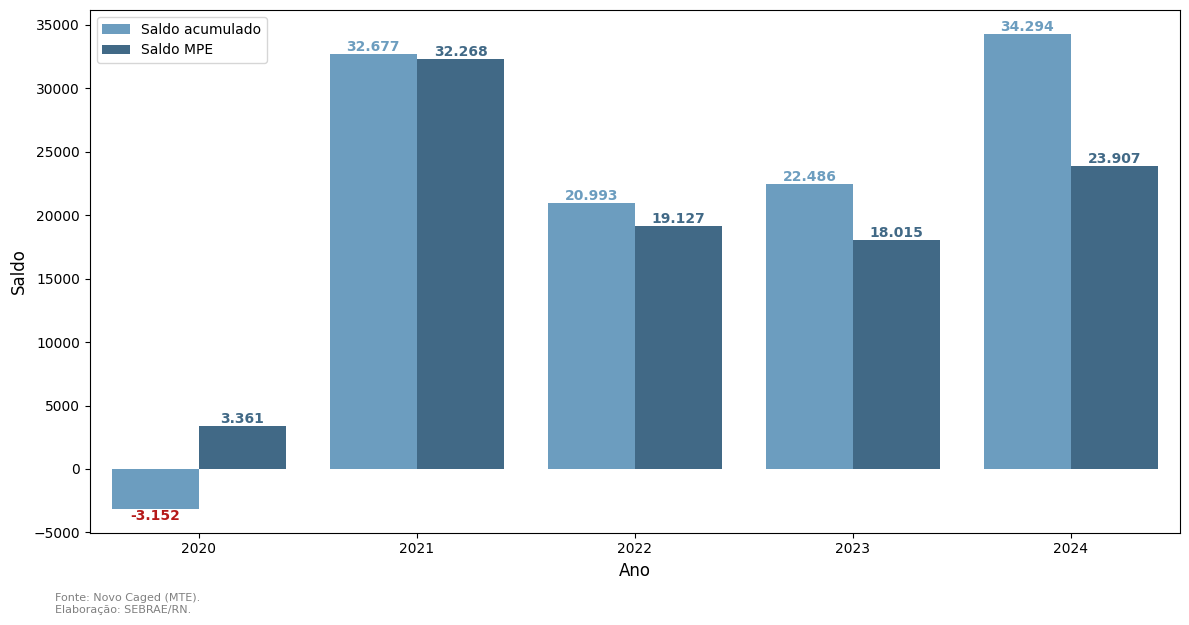

Gráfico salvo em: img/grafico_acumulado_ano_e_mpe.png


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_acumulado_ano_e_mpe(data, mpe):
    # Garantir que a coluna 'data' esteja no formato datetime
    data['data'] = pd.to_datetime(data['data'], errors='coerce')
    mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')

    # Criar novas colunas 'ano' e 'mes' para agrupamento em ambas as bases
    data['ano'] = data['data'].dt.year
    mpe['ano'] = mpe['data'].dt.year

    # Filtrar os últimos 4 anos na base `data`
    ano_atual = data['ano'].max()
    anos_filtrados = list(range(ano_atual - 4, ano_atual + 1))  # Últimos 4 anos
    data_filtrada = data[data['ano'].isin(anos_filtrados)]
    mpe_filtrada = mpe[mpe['ano'].isin(anos_filtrados)]

    # Calcular o saldo acumulado do ano (base data)
    saldo_acumulado = data_filtrada.groupby('ano')['saldomovimentação'].sum().reset_index()
    saldo_acumulado.rename(columns={'saldomovimentação': 'Saldo acumulado'}, inplace=True)

    # Calcular o saldo acumulado do ano (base mpe)
    saldo_mpe = mpe_filtrada.groupby('ano')['saldomovimentação'].sum().reset_index()
    saldo_mpe.rename(columns={'saldomovimentação': 'Saldo MPE'}, inplace=True)

    # Unir os dois conjuntos de dados
    merged_data = pd.merge(saldo_acumulado, saldo_mpe, on='ano', how='outer').fillna(0)

    # Transformar os dados para formato longo (long format) para o gráfico
    melted_data = pd.melt(merged_data, id_vars='ano', value_vars=['Saldo acumulado', 'Saldo MPE'],
                          var_name='Tipo', value_name='Saldo')

    # Criar o gráfico de barras
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='ano', y='Saldo', hue='Tipo', data=melted_data, palette='Blues_d')

    # Remover o título da legenda
    ax.legend(title=None)

    # Títulos e rótulos
    plt.xlabel("Ano", fontsize=12)
    plt.ylabel("Saldo", fontsize=12)

# Adicionar valores no topo de cada barra
    for p in ax.patches:
        height = p.get_height()
        bar_color = p.get_facecolor()  # Cor da barra
        
        if height != 0:  # Evitar exibir "0"
            text_color = "#b51919" if height < 0 else bar_color  # Vermelho para negativos, cor da barra para positivos
            
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (no topo da barra)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='bottom' if height >= 0 else 'top', fontsize=10, fontweight='bold',
                color=text_color  # Define a cor do texto
            )

    # Adicionar informações de fonte e elaboração
    plt.figtext(0.05, -0.01, 'Fonte: Novo Caged (MTE).',
                ha='left', fontsize=8, color='gray', weight='normal')
    plt.figtext(0.05, -0.03, 'Elaboração: SEBRAE/RN.',
                ha='left', fontsize=8, color='gray', weight='normal')

    # Ajustar layout
    plt.tight_layout()

    # Salvar o gráfico
    grafico_path = f'img/grafico_acumulado_ano_e_mpe.png'
    plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
    plt.show()

    return grafico_path

# Exemplo de chamada da função
# Suponha que `data` e `mpe` sejam DataFrames previamente carregados
grafico_path = criar_grafico_acumulado_ano_e_mpe(data, mpe)
print(f"Gráfico salvo em: {grafico_path}")


C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\598961860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')
C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\598961860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['ano'] = mpe['data'].dt.year


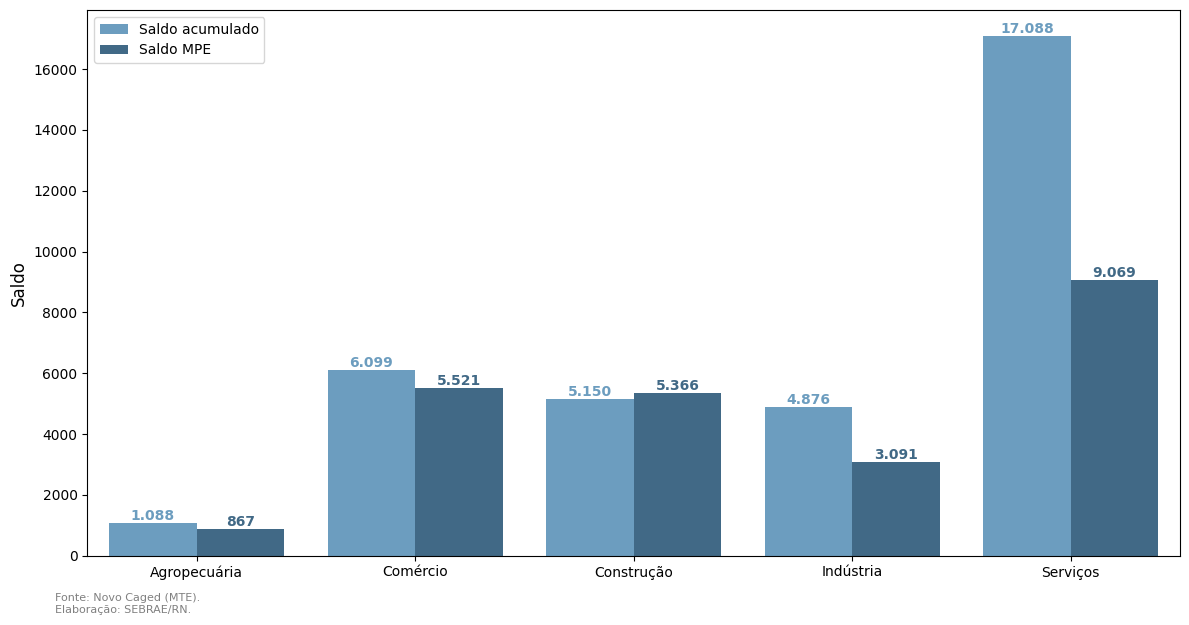

Gráfico salvo em: img/grafico_acumulado_setor_2024.png


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_acumulado_setor(data, mpe):
    # Garantir que a coluna 'data' esteja no formato datetime
    data['data'] = pd.to_datetime(data['data'], errors='coerce')
    mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')

    # Criar coluna 'ano' para filtrar pelo ano atual
    data['ano'] = data['data'].dt.year
    mpe['ano'] = mpe['data'].dt.year

    # Filtrar apenas o ano atual
    ano_atual = data['ano'].max()
    data_filtrada = data[data['ano'] == ano_atual]
    mpe_filtrada = mpe[mpe['ano'] == ano_atual]

    # Calcular o saldo acumulado por setor (base data)
    saldo_acumulado = data_filtrada.groupby('grande_grupamento')['saldomovimentação'].sum().reset_index()
    saldo_acumulado.rename(columns={'saldomovimentação': 'Saldo acumulado'}, inplace=True)

    # Calcular o saldo acumulado por setor (base mpe)
    saldo_mpe = mpe_filtrada.groupby('grande_grupamento')['saldomovimentação'].sum().reset_index()
    saldo_mpe.rename(columns={'saldomovimentação': 'Saldo MPE'}, inplace=True)

    # Unir os dois conjuntos de dados
    merged_data = pd.merge(saldo_acumulado, saldo_mpe, on='grande_grupamento', how='outer').fillna(0)

    # Transformar os dados para formato longo (long format) para o gráfico
    melted_data = pd.melt(merged_data, id_vars='grande_grupamento', value_vars=['Saldo acumulado', 'Saldo MPE'],
                          var_name='Tipo', value_name='Saldo')

    # Criar o gráfico de barras verticais
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='grande_grupamento', y='Saldo', hue='Tipo', data=melted_data, palette='Blues_d')

    # Remover o título da legenda
    ax.legend(title=None)

    # Títulos e rótulos
    plt.xlabel("", fontsize=12)
    plt.ylabel("Saldo", fontsize=12)
    plt.xticks(rotation=0, ha='center')  # Rotacionar os rótulos do eixo X para melhor visualização

    # Adicionar valores no topo de cada barra
    for p in ax.patches:
        height = p.get_height()
        if height != 0:  # Evitar exibir "0"
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (no topo da barra)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                color=p.get_facecolor()  # Define a cor do texto igual à cor da barra
            )

    # Adicionar informações de fonte e elaboração
    plt.figtext(0.05, -0.01, 'Fonte: Novo Caged (MTE).',
                ha='left', fontsize=8, color='gray', weight='normal')
    plt.figtext(0.05, -0.03, 'Elaboração: SEBRAE/RN.',
                ha='left', fontsize=8, color='gray', weight='normal')

    # Ajustar layout
    plt.tight_layout()

    # Salvar o gráfico
    grafico_path = f'img/grafico_acumulado_setor_{ano_atual}.png'
    plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
    plt.show()

    return grafico_path

# Exemplo de chamada da função
# Suponha que `data` e `mpe` sejam DataFrames previamente carregados
grafico_path = criar_grafico_acumulado_setor(data, mpe)
print(f"Gráfico salvo em: {grafico_path}")


In [33]:
def criar_tabela_top_10_cnaes(data, mpe):
    # Garantir que a coluna 'data' esteja no formato datetime
    data['data'] = pd.to_datetime(data['data'], errors='coerce')
    mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')

    # Criar coluna 'ano' para filtrar pelo ano atual
    data['ano'] = data['data'].dt.year
    mpe['ano'] = mpe['data'].dt.year

    # Filtrar apenas o ano atual
    ano_atual = data['ano'].max()
    data_filtrada = data[data['ano'] == ano_atual]
    mpe_filtrada = mpe[mpe['ano'] == ano_atual]

    # Calcular o saldo acumulado por CNAE (base data)
    saldo_acumulado = data_filtrada.groupby(['desc_cnae', 'grande_grupamento'])['saldomovimentação'].sum().reset_index()
    saldo_acumulado.rename(columns={'saldomovimentação': 'Saldo acumulado'}, inplace=True)

    # Calcular o saldo acumulado por CNAE (base mpe)
    saldo_mpe = mpe_filtrada.groupby(['desc_cnae', 'grande_grupamento'])['saldomovimentação'].sum().reset_index()
    saldo_mpe.rename(columns={'saldomovimentação': 'Saldo MPE'}, inplace=True)

    # Unir os dois conjuntos de dados
    merged_data = pd.merge(saldo_acumulado, saldo_mpe, on=['desc_cnae', 'grande_grupamento'], how='outer').fillna(0)

    # Ordenar pelos 10 maiores saldos acumulados
    top_10_cnaes = merged_data.sort_values(by='Saldo acumulado', ascending=False).head(10)

    # Renomear as colunas para a tabela final
    top_10_cnaes.rename(columns={'desc_cnae': 'CNAE', 'grande_grupamento': 'Setor'}, inplace=True)

    return top_10_cnaes

# Exemplo de chamada da função
tabela_top_10 = criar_tabela_top_10_cnaes(data, mpe)

tabela_top_10

C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\198645913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')
C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\198645913.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['ano'] = mpe['data'].dt.year


,CNAE,Setor,Saldo acumulado,Saldo MPE
829,"Serviços combinados para apoio a edifícios, ex...",Serviços,3792,47.0
108,Atividades de teleatendimento,Serviços,3413,-34.0
329,Construção de edifícios,Construção,1425,1305.0
323,"Confecção de peças do vestuário, exceto roupas...",Indústria,1222,-78.0
732,Outras obras de engenharia civil não especific...,Construção,1085,1009.0
333,Construção de obras de arte especiais,Construção,868,209.0
809,Restaurantes e similares,Serviços,866,848.0
644,Instalação e manutenção elétrica,Construção,842,598.0
267,Comércio varejista de artigos do vestuário e a...,Comércio,670,349.0
298,"Comércio varejista de mercadorias em geral, co...",Comércio,665,554.0


In [34]:
def salvar_tabela_png(df, filename='img/tabela_top_10.png', figsize=(12, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('tight')
    ax.axis('off')
    
    # Criando a tabela
    table = ax.table(cellText=df.values, 
                     colLabels=df.columns, 
                     cellLoc='center', 
                     loc='center')
    
    # Ajustar a escala da tabela
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    
    # Salvar como PNG
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()

# Salvar a tabela como PNG
salvar_tabela_png(tabela_top_10)

In [35]:
def criar_tabela_top_10_cnaes_mpe(data, mpe):
    # Garantir que a coluna 'data' esteja no formato datetime
    data['data'] = pd.to_datetime(data['data'], errors='coerce')
    mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')

    # Criar coluna 'ano' para filtrar pelo ano atual
    data['ano'] = data['data'].dt.year
    mpe['ano'] = mpe['data'].dt.year

    # Filtrar apenas o ano atual
    ano_atual = data['ano'].max()
    data_filtrada = data[data['ano'] == ano_atual]
    mpe_filtrada = mpe[mpe['ano'] == ano_atual]

    # Calcular o saldo acumulado por CNAE (base data)
    saldo_acumulado = data_filtrada.groupby(['desc_cnae', 'grande_grupamento'])['saldomovimentação'].sum().reset_index()
    saldo_acumulado.rename(columns={'saldomovimentação': 'Saldo acumulado'}, inplace=True)

    # Calcular o saldo acumulado por CNAE (base mpe)
    saldo_mpe = mpe_filtrada.groupby(['desc_cnae', 'grande_grupamento'])['saldomovimentação'].sum().reset_index()
    saldo_mpe.rename(columns={'saldomovimentação': 'Saldo MPE'}, inplace=True)

    # Unir os dois conjuntos de dados
    merged_data = pd.merge(saldo_acumulado, saldo_mpe, on=['desc_cnae', 'grande_grupamento'], how='outer').fillna(0)

    # Ordenar pelos 10 maiores saldos acumulados
    top_10_cnaes = merged_data.sort_values(by='Saldo MPE', ascending=False).head(10)

    # Renomear as colunas para a tabela final
    top_10_cnaes.rename(columns={'desc_cnae': 'CNAE', 'grande_grupamento': 'Setor'}, inplace=True)

    return top_10_cnaes

# Exemplo de chamada da função
tabela_top_10_mpe = criar_tabela_top_10_cnaes_mpe(data, mpe)

tabela_top_10_mpe

C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\1775876362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')
C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\1775876362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['ano'] = mpe['data'].dt.year


,CNAE,Setor,Saldo acumulado,Saldo MPE
329,Construção de edifícios,Construção,1425,1305.0
732,Outras obras de engenharia civil não especific...,Construção,1085,1009.0
911,"Transporte rodoviário de carga, exceto produto...",Serviços,11,911.0
809,Restaurantes e similares,Serviços,866,848.0
644,Instalação e manutenção elétrica,Construção,842,598.0
298,"Comércio varejista de mercadorias em geral, co...",Comércio,665,554.0
638,Incorporação de empreendimentos imobiliários,Construção,510,553.0
828,Serviços combinados de escritório e apoio admi...,Serviços,591,544.0
704,Obras de montagem industrial,Construção,515,515.0
821,"Serviço de preparação de terreno, cultivo e co...",Agropecuária,453,453.0


C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\1546910011.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='porte', y='Saldo acumulado', data=saldo_por_porte, palette='Blues_d', order=saldo_por_porte['porte'])


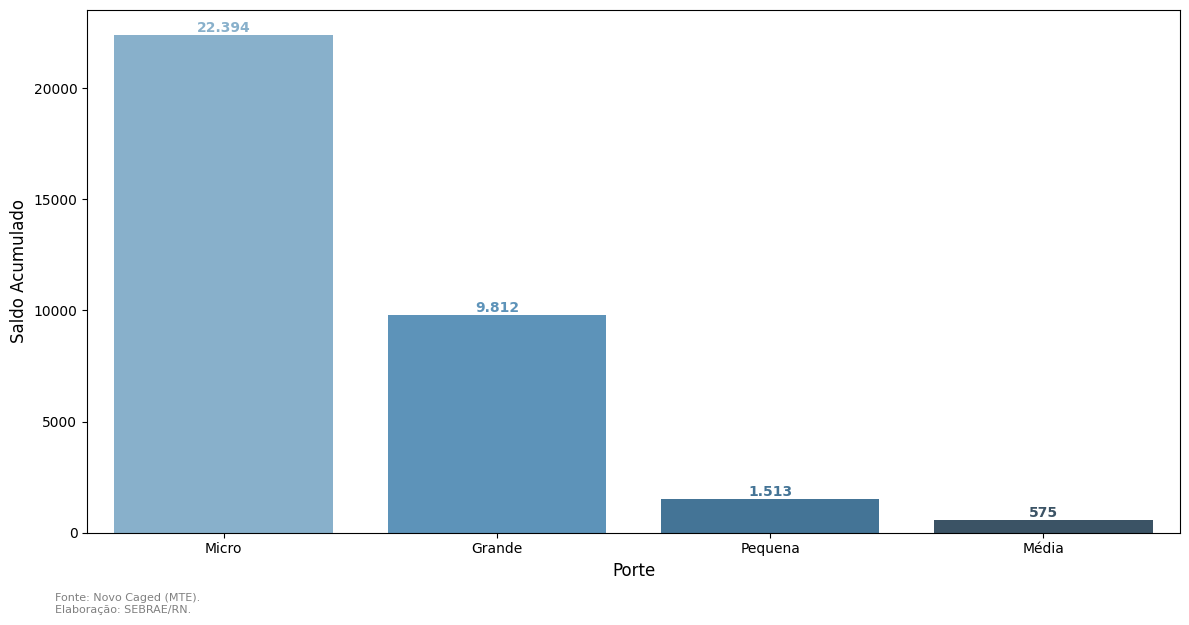

Gráfico salvo em: None


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_saldo_acumulado_porte(data):
    # Garantir que a coluna 'data' esteja no formato datetime
    data['data'] = pd.to_datetime(data['data'], errors='coerce')

    # Criar coluna 'ano' para filtrar pelo ano atual
    data['ano'] = data['data'].dt.year

    # Filtrar apenas o ano atual
    ano_atual = data['ano'].max()
    data_filtrada = data[data['ano'] == ano_atual]

    # Calcular o saldo acumulado por porte
    saldo_por_porte = data_filtrada.groupby('porte')['saldomovimentação'].sum().reset_index()
    saldo_por_porte.rename(columns={'saldomovimentação': 'Saldo acumulado'}, inplace=True)

    # Ordenar os dados do maior para o menor saldo acumulado
    saldo_por_porte = saldo_por_porte.sort_values(by='Saldo acumulado', ascending=False)

    # Criar o gráfico de barras
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='porte', y='Saldo acumulado', data=saldo_por_porte, palette='Blues_d', order=saldo_por_porte['porte'])

    # Adicionar valores no topo de cada barra com a mesma cor das colunas
    for p in ax.patches:
        height = p.get_height()
        if height != 0:  # Evitar exibir "0"
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (no topo da barra)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                color=p.get_facecolor()  # Define a cor do texto igual à cor da barra
            )

    # Títulos e rótulos
    plt.title('')
    plt.xlabel('Porte', fontsize=12)
    plt.ylabel('Saldo Acumulado', fontsize=12)
    plt.xticks(rotation=0, ha='center')

    # Adicionar informações de fonte e elaboração
    plt.figtext(0.05, -0.01, 'Fonte: Novo Caged (MTE).',
                ha='left', fontsize=8, color='gray', weight='normal')
    plt.figtext(0.05, -0.03, 'Elaboração: SEBRAE/RN.',
                ha='left', fontsize=8, color='gray', weight='normal')

    # Ajustar layout
    plt.tight_layout()

    # Salvar o gráfico
    grafico_path = f'img/grafico_acumulado_porte_{ano_atual}.png'
    plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
    plt.show()

    # Exemplo de chamada da função
grafico_path = criar_grafico_saldo_acumulado_porte(data)
print(f"Gráfico salvo em: {grafico_path}")


In [37]:
data['data'] = pd.to_datetime(data['data'], errors='coerce')

data['ano'] = data['data'].dt.year
data['mes'] = data['data'].dt.month

    # Identificar o mês mais recente da base
mes_mais_recente = data['data'].max().month
# nome_mes_mais_recente = calendar.month_name[mes_mais_recente]  # Nome do mês (ex: Novembro)

    # Filtrar os últimos 4 anos
ano_atual = data['ano'].max()
anos_filtrados = list(range(ano_atual - 4, ano_atual + 1))  # Últimos 4 anos
data_filtrada = data[data['ano'].isin(anos_filtrados)]

    # Calcular o saldo acumulado do ano
saldo_acumulado = data_filtrada.groupby('ano')['saldomovimentação'].sum().reset_index()
saldo_acumulado.rename(columns={'saldomovimentação': 'Saldo acumulado'}, inplace=True)

In [38]:
# Agrupar os dados por ano e mês
saldo_por_mes = data_filtrada.groupby(['ano', 'mes'])['saldomovimentação'].sum().reset_index()

# # Adicionar o nome do mês para facilitar a leitura
# saldo_por_mes['nome_mes'] = saldo_por_mes['mes'].apply(lambda x: calendar.month_name[x])

# Ordenar os dados por ano e mês
saldo_por_mes = saldo_por_mes.sort_values(by=['ano', 'mes']).reset_index(drop=True)

# Exibir o resultado
print(saldo_por_mes)


     ano  mes  saldomovimentação
0   2020    1              -1074
1   2020    2              -2097
2   2020    3              -3041
3   2020    4             -10206
4   2020    5              -4496
5   2020    6                898
6   2020    7                611
7   2020    8               5600
8   2020    9               4270
9   2020   10               4280
10  2020   11               4163
11  2020   12              -2060
12  2021    1               1844
13  2021    2               1569
14  2021    3               1212
15  2021    4              -1045
16  2021    5               1662
17  2021    6               4622
18  2021    7               3903
19  2021    8               7441
20  2021    9               6367
21  2021   10               3471
22  2021   11               3162
23  2021   12              -1531
24  2022    1              -2599
25  2022    2               2147
26  2022    3              -1429
27  2022    4               1837
28  2022    5               3487
29  2022  

In [39]:
soma_2024 = saldo_por_mes[saldo_por_mes['ano'] == 2024]['saldomovimentação'].sum()

# Exibir o resultado
print(f"Soma total do saldo de 2024: {soma_2024}")

Soma total do saldo de 2024: 34294


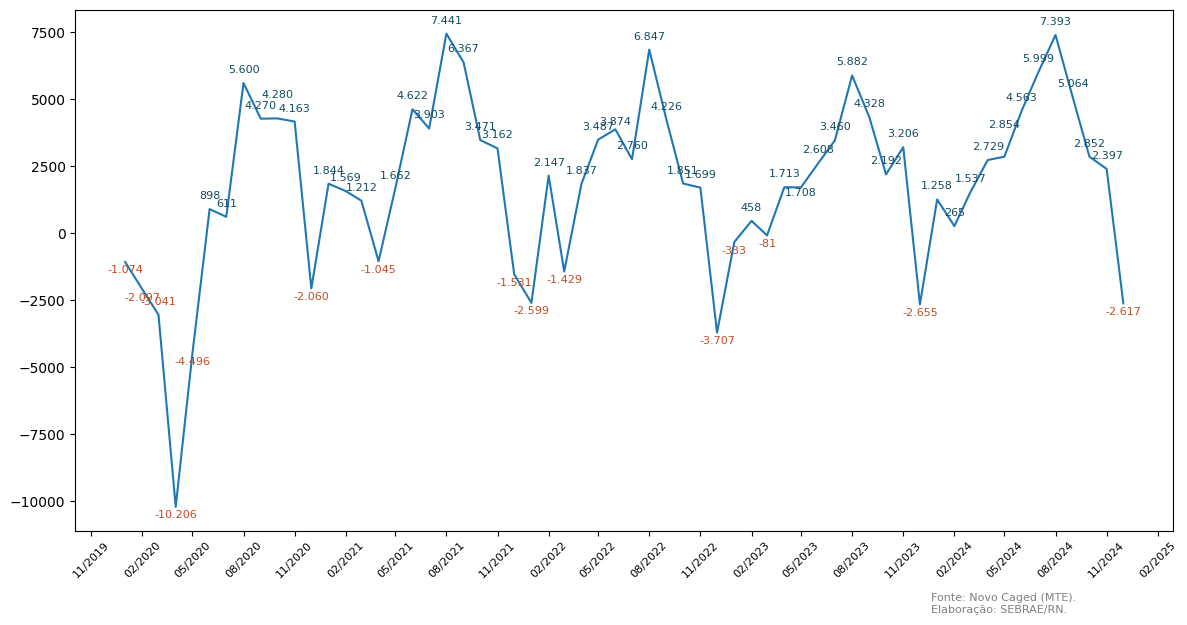

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

def criar_grafico_ts(data):
    # Certifique-se de que a coluna 'data' é do tipo datetime
    if not pd.api.types.is_datetime64_any_dtype(data['data']):
        data['data'] = pd.to_datetime(data['data'])

    # Agrupamento dos dados
    grouped_data = data.groupby('data')['saldomovimentação'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='data', y='saldomovimentação', data=grouped_data)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("")

    # Configurações do eixo X para datas
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Exibe de 3 em 3 meses
    plt.xticks(rotation=45, fontsize=8)  # Diminui o tamanho da fonte para 8

    # Ajuste de espaçamento do gráfico
    plt.tight_layout()

    # Adicionar valores nos pontos
    last_y = None
    for x, y in zip(grouped_data['data'], grouped_data['saldomovimentação']):
        color = '#134b5f' if y >= 0 else '#be4d25'
        offset = 300 if y >= 0 else -500

        # Ajuste dinâmico para evitar sobreposição
        if last_y is not None and abs(y - last_y) < 500:
            offset = -300 if y > last_y else 300

        # Levantar o número específico do mês 10/2020
        if x.strftime('%m/%Y') == '10/2020':
            offset += 400  # Aumenta o deslocamento vertical

        if x.strftime('%m/%Y') == '06/2022':
            offset += 400  # Aumenta o deslocamento vertical

        if x.strftime('%m/%Y') == '05/2023':
            offset += -700  # Aumenta o deslocamento vertical

        if x.strftime('%m/%Y') == '05/2024':
            offset += 700  # Aumenta o deslocamento vertical

        plt.text(x, y + offset, '{:,.0f}'.format(y).replace(',', '.'),
                 ha='center', va='bottom', fontsize=8, color=color)
        last_y = y + offset

    # Notas no rodapé
    plt.figtext(0.78, -0.01, 'Fonte: Novo Caged (MTE).',
                ha='left', fontsize=8, color='gray', weight='normal')
    plt.figtext(0.78, -0.03, 'Elaboração: SEBRAE/RN.',
                ha='left', fontsize=8, color='gray', weight='normal')

    # Salvar gráfico
    grafico_path = 'img/grafico_saldo_ts.png'
    plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
    plt.show()

    return grafico_path

# Uso da função
grafico_ts = criar_grafico_ts(data)


In [41]:
# def criar_grafico_saldo_setor(data, competencia, top_cnaes_df):
#     # Filtrar os dados para a competência desejada
#     data_mes = data.loc[data['competênciamov'] == competencia]

#     # Agrupar os dados por 'grande_grupamento' e somar o saldo de movimentação
#     grouped_data = data_mes.groupby('grande_grupamento')['saldomovimentação'].sum().reset_index()

#     # Adicionar o principal CNAE ajustado ao agrupamento
#     def obter_top_desc_cnae(grupo):
#         # Filtrar o dataframe de top CNAEs para o setor atual
#         cnaes_setor = top_cnaes_df[top_cnaes_df['Setor'] == grupo]
#         if not cnaes_setor.empty:
#             # Pegar o top 1 CNAE
#             top_cnae = cnaes_setor.iloc[0]
#             cnae_text = f"{top_cnae['CNAE']}: {int(top_cnae['Saldo de Movimentação'])}"
#             # Adicionar quebra de linha se o texto for muito longo
#             if len(cnae_text) > 30:
#                 cnae_text = '\n'.join([cnae_text[i:i+30] for i in range(0, len(cnae_text), 30)])
#             return cnae_text
#         return ""

#     # Criar uma nova coluna com o principal CNAE ajustado
#     grouped_data['top_desc_cnae'] = grouped_data['grande_grupamento'].apply(obter_top_desc_cnae)

#     # Ordenar os dados para exibir os maiores valores primeiro, se necessário
#     grouped_data = grouped_data.sort_values(by='saldomovimentação', ascending=False)

#     # Criar o gráfico de barras
#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='grande_grupamento', y='saldomovimentação', data=grouped_data, palette='Blues_d')

#     # Títulos e rótulos
#     plt.ylabel("")
#     plt.xlabel("")  # Remove o nome do eixo X

#     # Adicionar a linha horizontal no valor 0 do eixo Y
#     plt.axhline(0, color='black', linewidth=1)

#     # Adicionar os valores de cada barra dentro delas com formatação
#     for i, p in enumerate(ax.patches):
#         # Posição de cada barra
#         height = p.get_height()
#         # Pegar o desc_cnae e saldo correspondentes
#         cnae_desc = grouped_data.iloc[i]['top_desc_cnae']

#         # Adicionar o valor no topo da barra
#         ax.text(p.get_x() + p.get_width() / 2., height + (0.01 * max(grouped_data['saldomovimentação'])),  # Ajuste para cima
#                 '{:,.0f}'.format(height).replace(',', '.'),
#                 ha="center", va="bottom", fontsize=10, fontweight='bold')

#         # Adicionar o top 1 CNAE e saldo abaixo do nome do setor
#         ax.text(p.get_x() + p.get_width() / 2., -0.27 * max(grouped_data['saldomovimentação']),  # Ajuste para abaixo do eixo X
#                 f"{cnae_desc}",
#                 ha="center", va="top", fontsize=8, color='#154c79')

#     # Ajustar layout para evitar sobreposição
#     plt.tight_layout()

#     # Adicionar texto de rodapé
#     plt.figtext(0.03, -0.01, 'Fonte: Novo Caged (MTE).',
#                 ha='left', fontsize=8, color='gray', weight='normal')
#     plt.figtext(0.03, -0.03, 'Elaboração: SEBRAE/RN.',
#                 ha='left', fontsize=8, color='gray', weight='normal')

#     # Salvar gráfico como arquivo PNG
#     grafico_path = 'img/grafico_saldo_setor.png'
#     plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)

#     return grafico_path

# # Exemplo de chamada da função
# grafico_saldo_setor = criar_grafico_saldo_setor(data, competencia, top_cnaes_df)

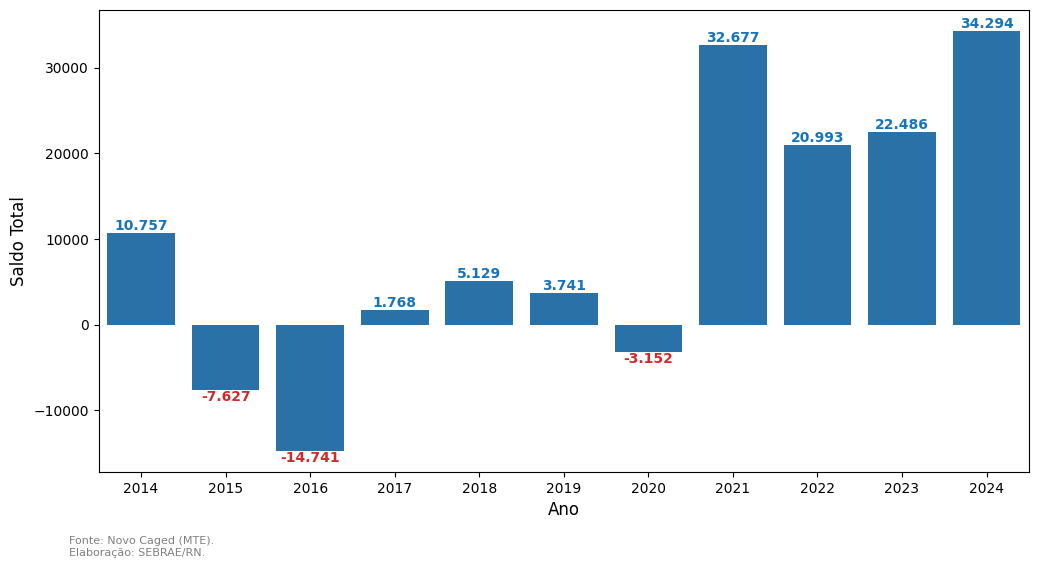

Gráfico salvo em: img/grafico_saldo_anual.png


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_anos_anteriores(data, cagedest_rn_saldo_mensal):
    # Converter a coluna 'data' para o formato datetime
    data['data'] = pd.to_datetime(data['data'], errors='coerce')
    cagedest_rn_saldo_mensal['data'] = pd.to_datetime(cagedest_rn_saldo_mensal['data'], errors='coerce')

    # Filtrar os dados a partir de 2014 (ano inteiro)
    data = data[data['data'].dt.year >= 2014]
    cagedest_rn_saldo_mensal = cagedest_rn_saldo_mensal[cagedest_rn_saldo_mensal['data'].dt.year >= 2014]

    # Agrupar os dados anuais somando os saldos
    data_grouped = data.groupby(data['data'].dt.year)['saldomovimentação'].sum().reset_index()
    cagedest_grouped = cagedest_rn_saldo_mensal.groupby(cagedest_rn_saldo_mensal['data'].dt.year)['Saldo'].sum().reset_index()

    # Renomear colunas para evitar conflitos
    data_grouped.rename(columns={'saldomovimentação': 'Saldo Data', 'data': 'Ano'}, inplace=True)
    cagedest_grouped.rename(columns={'Saldo': 'Saldo Cagedest', 'data': 'Ano'}, inplace=True)

    # Fazer a união dos dois conjuntos de dados (merge)
    merged_data = pd.merge(data_grouped, cagedest_grouped, on='Ano', how='outer').fillna(0)

    # Somar os saldos para um total consolidado
    merged_data['Saldo Total'] = merged_data['Saldo Data'] + merged_data['Saldo Cagedest']

    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Ano', y='Saldo Total', data=merged_data, color="#1574bc")

    # Títulos e rótulos
    plt.xlabel("Ano", fontsize=12)
    plt.ylabel("Saldo Total", fontsize=12)
    plt.title("", fontsize=14)

    # Adicionar valores no topo de cada barra (ajustar para números negativos)
    for p in ax.patches:
        height = p.get_height()
        if height >= 0:
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (no topo da barra)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='#1574bc'
            )
        else:
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (acima do valor negativo)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='top', fontsize=10, fontweight='bold', color='#d62728'
            )
    
    plt.figtext(0.1, -0.01, 'Fonte: Novo Caged (MTE).',
                    ha='left', fontsize=8, color='gray', weight='normal')
    plt.figtext(0.1, -0.03, 'Elaboração: SEBRAE/RN.',
                    ha='left', fontsize=8, color='gray', weight='normal')

    # Salvar o gráfico
    grafico_path = 'img/grafico_saldo_anual.png'
    plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
    plt.show()

    return grafico_path

# Exemplo de chamada da função
grafico_path = criar_grafico_anos_anteriores(data, cagedest_rn_saldo_mensal)
print(f"Gráfico salvo em: {grafico_path}")


C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\159925322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')


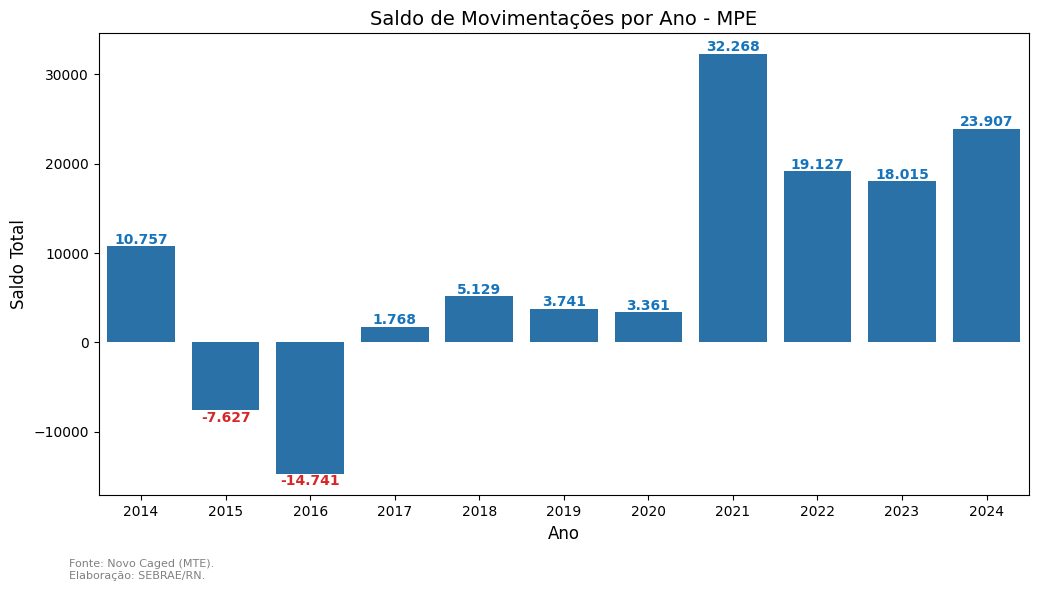

Gráfico salvo em: img/grafico_saldo_anual_mpe.png


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_anos_anteriores_mpe(mpe, cagedest_rn_saldo_mensal):
    # Converter a coluna 'data' para o formato datetime
    mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')
    cagedest_rn_saldo_mensal['data'] = pd.to_datetime(cagedest_rn_saldo_mensal['data'], errors='coerce')

    # Filtrar os dados a partir de 2014 (ano inteiro)
    mpe = mpe[mpe['data'].dt.year >= 2014]
    cagedest_rn_saldo_mensal = cagedest_rn_saldo_mensal[cagedest_rn_saldo_mensal['data'].dt.year >= 2014]

    # Agrupar os dados anuais somando os saldos
    mpe_grouped = mpe.groupby(mpe['data'].dt.year)['saldomovimentação'].sum().reset_index()
    cagedest_grouped = cagedest_rn_saldo_mensal.groupby(cagedest_rn_saldo_mensal['data'].dt.year)['Saldo'].sum().reset_index()

    # Renomear colunas para evitar conflitos
    mpe_grouped.rename(columns={'saldomovimentação': 'Saldo MPE', 'data': 'Ano'}, inplace=True)
    cagedest_grouped.rename(columns={'Saldo': 'Saldo Cagedest', 'data': 'Ano'}, inplace=True)

    # Fazer a união dos dois conjuntos de dados (merge)
    merged_data = pd.merge(mpe_grouped, cagedest_grouped, on='Ano', how='outer').fillna(0)

    # Somar os saldos para um total consolidado
    merged_data['Saldo Total'] = merged_data['Saldo MPE'] + merged_data['Saldo Cagedest']

    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Ano', y='Saldo Total', data=merged_data, color="#1574bc")

    # Títulos e rótulos
    plt.xlabel("Ano", fontsize=12)
    plt.ylabel("Saldo Total", fontsize=12)
    plt.title("Saldo de Movimentações por Ano - MPE", fontsize=14)

    # Adicionar valores no topo de cada barra (ajustar para números negativos)
    for p in ax.patches:
        height = p.get_height()
        if height >= 0:
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (no topo da barra)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='#1574bc'
            )
        else:
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (acima do valor negativo)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='top', fontsize=10, fontweight='bold', color='#d62728'
            )
    
    plt.figtext(0.1, -0.01, 'Fonte: Novo Caged (MTE).',
                    ha='left', fontsize=8, color='gray', weight='normal')
    plt.figtext(0.1, -0.03, 'Elaboração: SEBRAE/RN.',
                    ha='left', fontsize=8, color='gray', weight='normal')

    # Salvar o gráfico
    grafico_path = 'img/grafico_saldo_anual_mpe.png'
    plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
    plt.show()

    return grafico_path

# Exemplo de chamada da função
grafico_path = criar_grafico_anos_anteriores_mpe(mpe, cagedest_rn_saldo_mensal)
print(f"Gráfico salvo em: {grafico_path}")


In [44]:
print("Anos em data:", sorted(data['data'].dt.year.unique()))
print("Anos em mpe:", sorted(mpe['data'].dt.year.unique()))
print("Anos em cagedest_rn_saldo_mensal:", sorted(cagedest_rn_saldo_mensal['data'].dt.year.unique()))


Anos em data: [np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
Anos em mpe: [np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
Anos em cagedest_rn_saldo_mensal: [np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019)]


In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def criar_grafico_nordeste(data):
#     # Ordenar os dados por saldo para exibir os maiores valores primeiro, se necessário
#     grouped_data = data.sort_values(by='Saldo', ascending=False)

#     # Customizar as cores das barras
#     colors = ['#3a4e5c' if nome == 'Rio Grande do Norte' else '#6c9dbf' for nome in grouped_data['Nome']]

#     # Criar o gráfico de barras
#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='Nome', y='Saldo', data=grouped_data, palette=colors)

#     # Títulos e rótulos
#     plt.ylabel("")  # Remove o nome do eixo Y
#     plt.xlabel("")  # Remove o nome do eixo X

#     # Adicionar uma linha horizontal no valor 0 do eixo Y
#     plt.axhline(0, color='black', linewidth=1)

#     # Adicionar os valores de cada barra no gráfico
#     for p, color in zip(ax.patches, colors):
#         # Obter a altura da barra
#         height = p.get_height()
#         # Adicionar rótulo na parte superior da barra (ou inferior se for negativo)
#         if height >= 0:
#             ax.text(p.get_x() + p.get_width() / 2., height,  # Para barras positivas
#                     '{:,.0f}'.format(height).replace(',', '.'),
#                     ha="center", va="bottom", fontsize=10,
#                     fontweight='bold', color=color)
#         else:
#             ax.text(p.get_x() + p.get_width() / 2., height,  # Para barras negativas
#                     '{:,.0f}'.format(height).replace(',', '.'),
#                     ha="center", va="top", fontsize=10,
#                     fontweight='bold', color=color)
            
#     plt.figtext(0.05, -0.01, 'Fonte: Novo Caged (MTE).',
#                     ha='left', fontsize=8, color='gray', weight='normal')
#     plt.figtext(0.05, -0.03, 'Elaboração: SEBRAE/RN.',
#                     ha='left', fontsize=8, color='gray', weight='normal')

#     # Ajustar layout
#     plt.tight_layout()

#     # Salvar o gráfico como arquivo PNG
#     grafico_path = 'img/grafico_nordeste.png'
#     plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)

#     return grafico_path

# # Exemplo de chamada da função
# grafico_nordeste = criar_grafico_nordeste(caged_nordeste)
# print(f"Gráfico salvo em: {grafico_nordeste}")


In [46]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import seaborn as sns
# import pandas as pd

# def criar_grafico_ts_porte(data):
#     # Converter a coluna 'competênciamov' para string, caso não seja
#     data['competênciamov'] = data['competênciamov'].astype(str)

#     # Filtrar os dados onde o ano da 'competênciamov' é igual ao ano de 'competencia'
#     ano_competencia = str(competencia)[:4]
#     data_ano = data[data['competênciamov'].str[:4] == ano_competencia]

#     # Garantir que a coluna 'data' seja do tipo datetime
#     data_ano['data'] = pd.to_datetime(data_ano['data'])

#     # Agrupar os dados por 'data' e 'porte', somando os valores de 'saldomovimentação'
#     grouped_data = data_ano.groupby(['data', 'porte'])['saldomovimentação'].sum().reset_index()

#     # Obter a lista de valores únicos de 'porte' e associar cores
#     unique_porte = grouped_data['porte'].unique()
#     palette = sns.color_palette("muted", n_colors=len(unique_porte))
#     color_mapping = dict(zip(unique_porte, palette))

#     # Criar o gráfico com hue para a coluna 'porte'
#     plt.figure(figsize=(12, 6))
#     ax = sns.lineplot(x='data', y='saldomovimentação', hue='porte', data=grouped_data, 
#                       marker="o", palette=color_mapping)

#     # Títulos e rótulos (ajustáveis conforme necessidade)
#     plt.title("")
#     plt.xlabel("")
#     plt.ylabel("")

#     # Adicionar a linha cinza no eixo Y = 0
#     plt.axhline(0, color='lightgray', linestyle='--', linewidth=1)
    
#     # Formatar os rótulos do eixo X para exibir apenas mês/ano
#     plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
#     plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Exibe de 1 em 1 mês
#     plt.xticks(rotation=45)

#     # Configurar os ticks do eixo X para garantir que todos os pontos sejam exibidos
#     unique_dates = grouped_data['data'].unique()
#     plt.xticks(ticks=unique_dates, labels=[date.strftime('%m/%Y') for date in unique_dates])

#     # Adicionar valores exatamente no centro dos pontos, com background colorido e números brancos
#     for porte in grouped_data['porte'].unique():
#         porte_data = grouped_data[grouped_data['porte'] == porte]
#         for x, y in zip(porte_data['data'], porte_data['saldomovimentação']):
#             # Adicionar texto com um fundo colorido (mesma cor da linha) e texto branco
#             plt.text(
#                 x, y, f'{int(y):,}'.replace(',', '.'),  # Formatação do número
#                 ha='center', va='center', fontsize=8, color='white',  # Cor do número
#                 bbox=dict(facecolor=color_mapping[porte], edgecolor='none', boxstyle='round,pad=0.2')  # Fundo colorido
#             )

#     # Legenda dentro do gráfico no canto superior esquerdo
#     plt.legend(
#         title="Porte", loc="upper left", frameon=True, fontsize=8,
#         title_fontsize=10, facecolor='white', edgecolor='black', fancybox=True
#     )

#     # Notas no rodapé
#     plt.figtext(0.08, -0.01, 'Fonte: Novo Caged (MTE).',
#                 ha='left', fontsize=8, color='gray', weight='normal')
#     plt.figtext(0.08, -0.03, 'Elaboração: SEBRAE/RN.',
#                 ha='left', fontsize=8, color='gray', weight='normal')

#     # Salvar gráfico
#     grafico_path = 'img/grafico_ts_porte.png'
#     plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
#     plt.show()
#     return grafico_path

# # Uso da função
# grafico_ts_porte = criar_grafico_ts_porte(data)


In [47]:
nordeste_porte = pd.read_csv("dados\caged_nordeste_porte.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\653933214.py:1: SyntaxWarning: invalid escape sequence '\c'
  nordeste_porte = pd.read_csv("dados\caged_nordeste_porte.csv")


In [48]:
nordeste_porte.head()

,uf,data,estado,porte,Saldo
0,21,2024-01-01,Maranhão,Grande,-1982
1,21,2024-01-01,Maranhão,Micro,2077
2,21,2024-01-01,Maranhão,Média,-212
3,21,2024-01-01,Maranhão,Pequena,-645
4,22,2024-01-01,Piauí,Grande,426


C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\3584859387.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='estado', y='Saldo', data=saldo_acumulado, palette=cores)


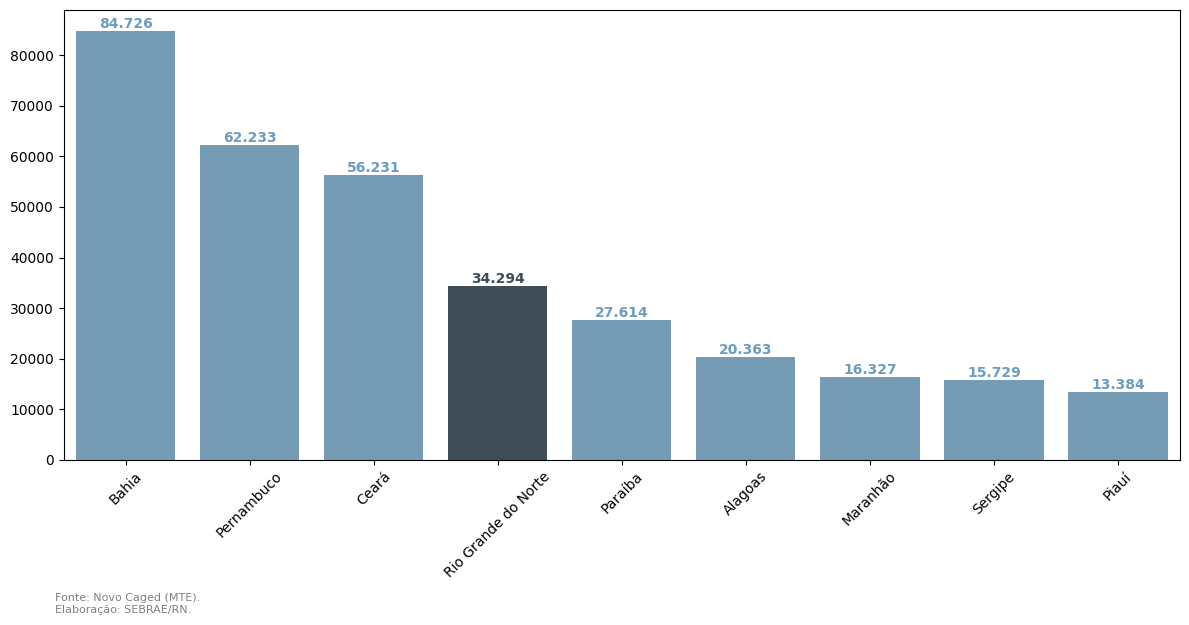

Gráfico salvo em: img/grafico_acumulado_estado_2024.png


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def criar_grafico_acumulado_estado(data):
    # Garantir que a coluna 'data' esteja no formato datetime
    data['data'] = pd.to_datetime(data['data'], errors='coerce')

    # Criar uma nova coluna 'ano' extraindo os primeiros 4 dígitos da data como string
    data['ano'] = data['data'].dt.year.astype(str)

    # Determinar o ano atual
    ano_atual = str(data['ano'].max())  # Garantir que está em formato string

    # Filtrar apenas os dados do ano atual
    data_filtrada = data[data['ano'] == ano_atual]

    # Calcular o saldo acumulado por estado e ordenar do maior para o menor
    saldo_acumulado = data_filtrada.groupby('estado')['Saldo'].sum().reset_index()
    saldo_acumulado = saldo_acumulado.sort_values(by='Saldo', ascending=False)

    # Definir cores personalizadas
    cor_destacada = '#3a4e5c'  # Cor do Rio Grande do Norte
    cor_padrao = '#6c9dbf'  # Cor dos outros estados
    cores = [cor_destacada if estado == 'Rio Grande do Norte' else cor_padrao for estado in saldo_acumulado['estado']]

    # Criar o gráfico de barras
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='estado', y='Saldo', data=saldo_acumulado, palette=cores)

    # Títulos e rótulos
    plt.xlabel("", fontsize=12)
    plt.ylabel("", fontsize=12)
    plt.title("")

    # Adicionar valores no topo de cada barra e ajustar a cor do texto
    for p, estado in zip(ax.patches, saldo_acumulado['estado']):
        height = p.get_height()
        if height != 0:  # Evitar exibir "0"
            cor_texto = cor_destacada if estado == 'Rio Grande do Norte' else cor_padrao  # Branco só para o RN
            ax.text(
                p.get_x() + p.get_width() / 2.,  # Posição horizontal
                height,  # Posição vertical (no topo da barra)
                '{:,.0f}'.format(height).replace(',', '.'),  # Formatação do número
                ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=10, fontweight='bold',
                color=cor_texto  # Define a cor correta para cada barra
            )

    # Adicionar informações de fonte e elaboração
    plt.figtext(0.05, -0.01, 'Fonte: Novo Caged (MTE).',
                ha='left', fontsize=8, color='gray', weight='normal')
    plt.figtext(0.05, -0.03, 'Elaboração: SEBRAE/RN.',
                ha='left', fontsize=8, color='gray', weight='normal')

    # Ajustar layout
    plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor visualização
    plt.tight_layout()

    # Salvar o gráfico
    grafico_path = f'img/grafico_acumulado_estado_{ano_atual}.png'
    plt.savefig(grafico_path, format='png', bbox_inches='tight', transparent=True)
    plt.show()

    return grafico_path

# Exemplo de chamada da função
grafico_path = criar_grafico_acumulado_estado(nordeste_porte)
print(f"Gráfico salvo em: {grafico_path}")


## Mapa

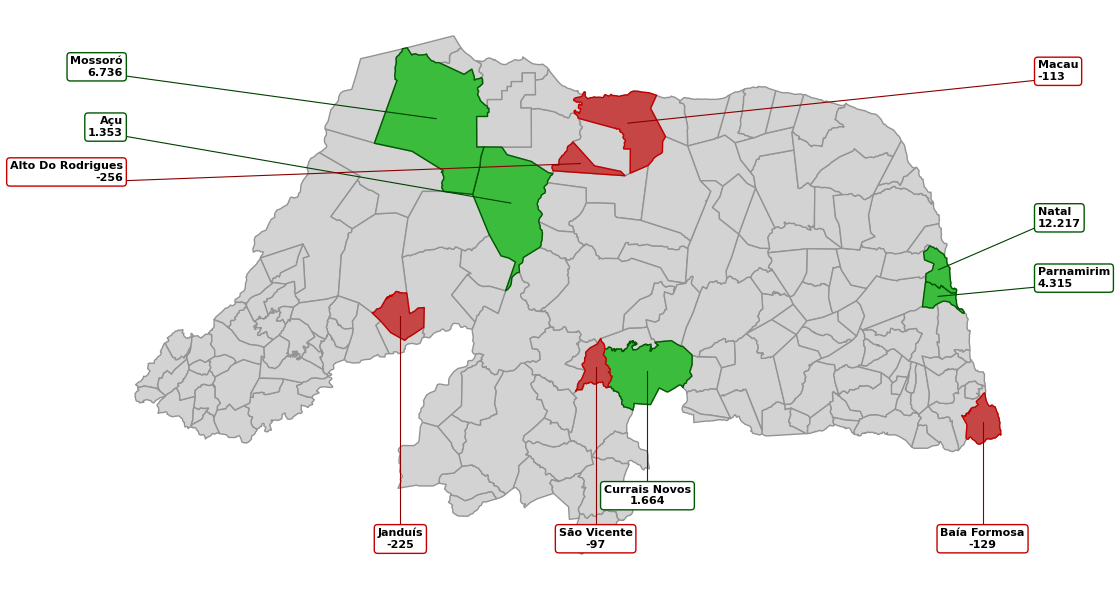

Mapa salvo como: img/mapa_saldo_acumulado.png


In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import geobr
from datetime import datetime

# Supondo que 'data' seja um DataFrame já carregado
# Garantir que a coluna 'data' esteja no formato datetime
data['data'] = pd.to_datetime(data['data'], errors='coerce')

# Filtrar os dados apenas do ano mais recente
ano_atual = data['data'].dt.year.max()
caged_ano_atual = data[data['data'].dt.year == ano_atual]

# Agrupar por município e calcular o saldo total
municipios = (
    caged_ano_atual.groupby("município", as_index=False)
    .agg(Saldo=("saldomovimentação", "sum"))
)

# Adicionar colunas de ranking (top 5 e bottom 5)
municipios["top5"] = municipios["Saldo"].rank(method="min", ascending=False).isin(range(1, 6))
municipios["bottom5"] = municipios["Saldo"].rank(method="min").isin(range(1, 6))
municipios = municipios.rename(columns={"município": "code_muni"})

# Carregar o mapa dos municípios do RN
rn_map = geobr.read_municipality(code_muni="RN")
rn_map['code_muni'] = rn_map['code_muni'].astype(str)
rn_map["code_muni"] = rn_map["code_muni"].str[:-3]  # Ajustar código do município

# Garantir que ambos sejam strings
rn_map['code_muni'] = rn_map['code_muni'].astype(str)
municipios['code_muni'] = municipios['code_muni'].astype(str)

# Mesclar os dados do saldo com o mapa
map_saldo = pd.merge(rn_map, municipios, on='code_muni', how='outer')

# Formatar a coluna 'Saldo' no formato brasileiro
map_saldo['Saldo'] = map_saldo['Saldo'].fillna(0).apply(lambda x: f"{int(x):,}".replace(",", "."))

# Criar coluna de rótulo para municípios selecionados
map_saldo["MUN_SALDO"] = map_saldo.apply(
    lambda x: f"{x['name_muni']}\n{x['Saldo']}" if x["top5"] or x["bottom5"] else None, axis=1
)

# Definir cores de preenchimento e borda
fill_palette = ["#3CBC3C", "#C64646", "#d3d3d3"]
border_palette = ["#005800", "#C30000", "#939393"]

map_saldo['fill_colors'] = map_saldo.apply(
    lambda x: fill_palette[0] if x['top5'] else (fill_palette[1] if x['bottom5'] else fill_palette[2]), axis=1
)

map_saldo['border_colors'] = map_saldo.apply(
    lambda x: border_palette[0] if x['top5'] else (border_palette[1] if x['bottom5'] else border_palette[2]), axis=1
)

# Converter para GeoDataFrame
map_saldo_sf = gpd.GeoDataFrame(map_saldo)

# Filtrar os top 5 e bottom 5
top5 = map_saldo_sf[map_saldo_sf['top5'].fillna(False)]
bottom5 = map_saldo_sf[map_saldo_sf['bottom5'].fillna(False)]

# Função para filtrar espacialmente
def filter_sf(data, xmin=None, xmax=None, ymin=None, ymax=None):
    bbox = box(xmin, ymin, xmax, ymax) if all([xmin, xmax, ymin, ymax]) else None
    if bbox:
        return data[data.intersects(bbox)]
    return data

# Filtragem por posição geográfica
direita = filter_sf(map_saldo_sf, xmin=-36.6)
esquerda = map_saldo_sf[~map_saldo_sf['code_muni'].isin(direita['code_muni'])]

# Cores para os textos
direita['text_colors'] = direita.apply(
    lambda x: "#07ca8d" if x['top5'] else ("#C30000" if x['bottom5'] else None), axis=1
)
esquerda['text_colors'] = esquerda.apply(
    lambda x: "#07ca8d" if x['top5'] else ("#C30000" if x['bottom5'] else None), axis=1
)

# Converter para CRS projetado
map_saldo_sf = map_saldo_sf.to_crs(epsg=3857)
top5 = top5.to_crs(epsg=3857)
bottom5 = bottom5.to_crs(epsg=3857)

# Calcular as coordenadas dos centróides
top5["centroid_x"] = top5.geometry.centroid.x
top5["centroid_y"] = top5.geometry.centroid.y
bottom5["centroid_x"] = bottom5.geometry.centroid.x
bottom5["centroid_y"] = bottom5.geometry.centroid.y

# Calcular a longitude e latitude central do mapa
x_center = map_saldo_sf.geometry.centroid.x.mean()
y_center = map_saldo_sf.geometry.centroid.y.mean()

# Separar top5 e bottom5 entre esquerda, direita e inferior
top5_esquerda = top5[(top5.geometry.centroid.x <= x_center) & (top5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
top5_direita = top5[(top5.geometry.centroid.x > x_center) & (top5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
top5_inferior = top5[top5.geometry.centroid.y < y_center].sort_values(by="centroid_x", ascending=True)

bottom5_esquerda = bottom5[(bottom5.geometry.centroid.x <= x_center) & (bottom5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
bottom5_direita = bottom5[(bottom5.geometry.centroid.x > x_center) & (bottom5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
bottom5_inferior = bottom5[bottom5.geometry.centroid.y < y_center].sort_values(by="centroid_x", ascending=True)

# Cores ajustadas
fill_colors = {"bottom5": "#C64646", "top5": "#3CBC3C"}
border_colors = {"top5": "#005800", "bottom5": "#C30000"}
darker_colors = {"top5": "#004000", "bottom5": "#8B0000"}

# Listas para evitar sobreposição de anotações
used_positions_right = []
used_positions_left = []
used_positions_bottom = []

# Função para encontrar posições não sobrepostas
def find_non_overlapping_position(base_y, used_positions, step=12000):
    y = base_y
    for _ in range(1000):
        if all(abs(y - used_y) > step for used_y in used_positions):
            used_positions.append(y)
            return y
        y -= step
    return y

# Função para anotar municípios
def annotate_cities(df, side, line_color, box_color, x_offset, y_offset=None):
    base_y = df["centroid_y"].max() + 20000 if side != "bottom" else y_center - 30000
    used_positions = used_positions_right if side == "right" else used_positions_left if side == "left" else used_positions_bottom

    for _, row in df.iterrows():
        centroid = row.geometry.centroid
        y = find_non_overlapping_position(base_y, used_positions, step=14000)
        base_y = y

        if side == "bottom":
            text_x = centroid.x
            text_y = y_center - y_offset
            ax.plot([centroid.x, text_x], [centroid.y, text_y], "-", color=line_color, lw=0.8)
            ax.text(
                text_x, text_y, row["MUN_SALDO"],
                fontsize=8, ha="center", va="top",
                weight="bold",
                bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
            )
        else:
            text_x = x_center + x_offset if side == "right" else x_center - x_offset
            ax.plot([centroid.x, text_x], [centroid.y, y], "-", color=line_color, lw=0.8)
            ax.text(
                text_x, y, row["MUN_SALDO"],
                fontsize=8, ha="left" if side == "right" else "right",
                weight="bold",
                bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
            )

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 6))
map_saldo_sf.plot(ax=ax, color="#d3d3d3", edgecolor="#939393", label="Outros Municípios")
top5.plot(ax=ax, color=fill_colors["top5"], edgecolor=border_colors["top5"], label="Top 5")
bottom5.plot(ax=ax, color=fill_colors["bottom5"], edgecolor=border_colors["bottom5"], label="Bottom 5")

# Anotar cidades
annotate_cities(top5_direita, "right", darker_colors["top5"], border_colors["top5"], 200000)
annotate_cities(bottom5_direita, "right", darker_colors["bottom5"], border_colors["bottom5"], 200000)
annotate_cities(top5_esquerda, "left", darker_colors["top5"], border_colors["top5"], 225000)
annotate_cities(bottom5_esquerda, "left", darker_colors["bottom5"], border_colors["bottom5"], 225000)
annotate_cities(top5_inferior, "bottom", darker_colors["top5"], border_colors["top5"], x_offset=0, y_offset=80000)
annotate_cities(bottom5_inferior, "bottom", darker_colors["bottom5"], border_colors["bottom5"], x_offset=0, y_offset=100000)

# Configurações finais do mapa
ax.set_title("")
ax.axis("off")
plt.tight_layout()

# Salvar o mapa
output_path = "img/mapa_saldo_acumulado.png"
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight", transparent=True)

# Mostrar o gráfico
plt.show()

print(f"Mapa salvo como: {output_path}")

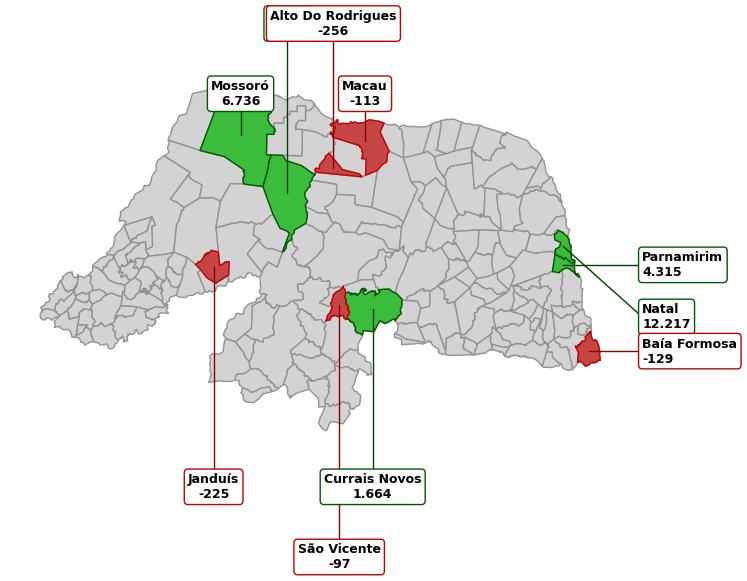

Mapa salvo como: img/mapa_saldo_acumulado.png


In [57]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import geobr
from datetime import datetime

# Supondo que 'data' seja um DataFrame já carregado
data['data'] = pd.to_datetime(data['data'], errors='coerce')

# Filtrar os dados apenas do ano mais recente
ano_atual = data['data'].dt.year.max()
caged_ano_atual = data[data['data'].dt.year == ano_atual]

# Agrupar por município e calcular o saldo total
municipios = (
    caged_ano_atual.groupby("município", as_index=False)
    .agg(Saldo=("saldomovimentação", "sum"))
)

# Adicionar colunas de ranking (top 5 e bottom 5)
municipios["top5"] = municipios["Saldo"].rank(method="min", ascending=False).isin(range(1, 6))
municipios["bottom5"] = municipios["Saldo"].rank(method="min").isin(range(1, 6))
municipios = municipios.rename(columns={"município": "code_muni"})

# Carregar o mapa dos municípios do RN
rn_map = geobr.read_municipality(code_muni="RN")
rn_map['code_muni'] = rn_map['code_muni'].astype(str)
rn_map["code_muni"] = rn_map["code_muni"].str[:-3]

# Garantir que ambos sejam strings antes do merge
municipios["code_muni"] = municipios["code_muni"].astype(str)
rn_map["code_muni"] = rn_map["code_muni"].astype(str)

# Mesclar os dados do saldo com o mapa
map_saldo = pd.merge(rn_map, municipios, on='code_muni', how='outer')

# Formatar a coluna 'Saldo' no formato brasileiro
map_saldo['Saldo'] = map_saldo['Saldo'].fillna(0).apply(lambda x: f"{int(x):,}".replace(",", "."))

# Criar coluna de rótulo para municípios selecionados
map_saldo["MUN_SALDO"] = map_saldo.apply(
    lambda x: f"{x['name_muni']}\n{x['Saldo']}" if x["top5"] or x["bottom5"] else None, axis=1
)

# Definir cores
fill_colors = {"bottom5": "#C64646", "top5": "#3CBC3C"}
border_colors = {"top5": "#005800", "bottom5": "#C30000"}
darker_colors = {"top5": "#004000", "bottom5": "#8B0000"}

# Converter para GeoDataFrame e para CRS projetado
map_saldo_sf = gpd.GeoDataFrame(map_saldo).to_crs(epsg=5880)

# Calcular os limites do estado
x_min, y_min, x_max, y_max = map_saldo_sf.total_bounds
x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

# Função para classificar a posição dos municípios
def classify_position(geometry):
    centroid = geometry.centroid
    distances = {
        "top": abs(centroid.y - y_max),
        "bottom": abs(centroid.y - y_min),
        "left": abs(centroid.x - x_min),
        "right": abs(centroid.x - x_max)
    }
    return min(distances, key=distances.get)  # Retorna a posição com menor distância

# Aplicar a classificação diretamente ao DataFrame original para evitar o erro
map_saldo_sf.loc[map_saldo_sf['top5'].fillna(False), "position"] = map_saldo_sf.loc[
    map_saldo_sf['top5'].fillna(False), "geometry"
].apply(classify_position)

map_saldo_sf.loc[map_saldo_sf['bottom5'].fillna(False), "position"] = map_saldo_sf.loc[
    map_saldo_sf['bottom5'].fillna(False), "geometry"
].apply(classify_position)

# Separar os municípios destacados
top5 = map_saldo_sf[map_saldo_sf['top5'].fillna(False)]
bottom5 = map_saldo_sf[map_saldo_sf['bottom5'].fillna(False)]

# Função para evitar sobreposição de rótulos
def find_non_overlapping_position(base_y, used_positions, step=12000):
    y = base_y
    for _ in range(1000):
        if all(abs(y - used_y) > step for used_y in used_positions):
            used_positions.append(y)
            return y
        y -= step
    return y

# Função para anotar municípios de forma dinâmica
def annotate_cities(df, position, line_color, box_color, x_offset=30000, y_offset=30000):
    used_positions = []

    for _, row in df.iterrows():
        centroid = row.geometry.centroid

        # Define a posição do texto com base na proximidade aos limites
        if position == "top":
            text_x, text_y = centroid.x, y_max + y_offset
            va, ha = "bottom", "center"
        elif position == "bottom":
            text_x, text_y = centroid.x, y_min - y_offset
            va, ha = "top", "center"
        elif position == "left":
            text_x, text_y = x_min - x_offset, centroid.y
            va, ha = "center", "right"
        else:  # "right"
            text_x, text_y = x_max + x_offset, centroid.y
            va, ha = "center", "left"

        # Evitar sobreposição de rótulos usando um espaçamento adequado
        y = find_non_overlapping_position(text_y, used_positions, step=25000)

        ax.plot([centroid.x, text_x], [centroid.y, y], "-", color=line_color, lw=1)
        ax.text(
            text_x, y, row["MUN_SALDO"],
            fontsize=9, ha=ha, va=va, weight="bold",
            bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
        )

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 6))
map_saldo_sf.plot(ax=ax, color="#d3d3d3", edgecolor="#939393", label="Outros Municípios")
top5.plot(ax=ax, color=fill_colors["top5"], edgecolor=border_colors["top5"], label="Top 5")
bottom5.plot(ax=ax, color=fill_colors["bottom5"], edgecolor=border_colors["bottom5"], label="Bottom 5")

# Aplicar anotações dinâmicas com base na classificação de proximidade
for pos in ["top", "bottom", "left", "right"]:
    annotate_cities(top5[top5["position"] == pos], pos, darker_colors["top5"], border_colors["top5"])
    annotate_cities(bottom5[bottom5["position"] == pos], pos, darker_colors["bottom5"], border_colors["bottom5"])

# Configurações finais do mapa
ax.set_title("")
ax.axis("off")
plt.tight_layout()

# Salvar o mapa
output_path = "img/mapa_saldo_acumulado.png"
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight", transparent=True)

# Mostrar o gráfico
plt.show()

print(f"Mapa salvo como: {output_path}")


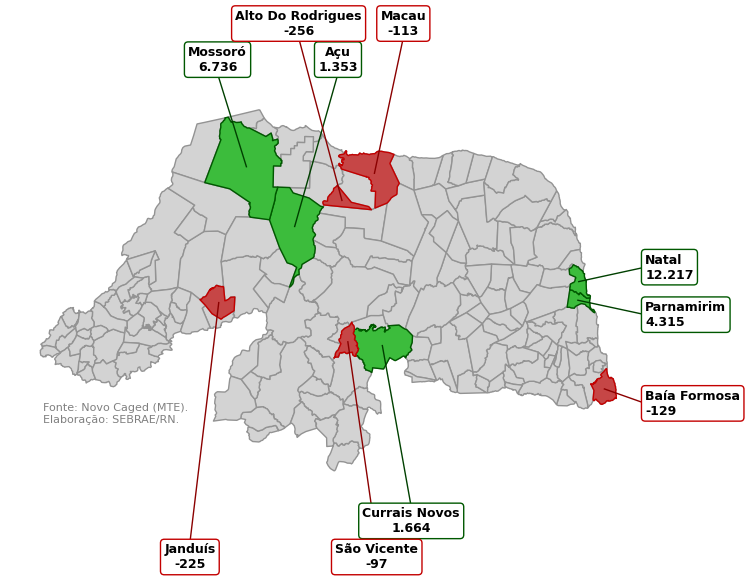

Mapa salvo como: img/mapa_saldo_acumulado.png
[12.  6.]


In [150]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import geobr
from datetime import datetime

# Supondo que 'data' seja um DataFrame já carregado
data['data'] = pd.to_datetime(data['data'], errors='coerce')

# Filtrar os dados apenas do ano mais recente
ano_atual = data['data'].dt.year.max()
caged_ano_atual = data[data['data'].dt.year == ano_atual]

# Agrupar por município e calcular o saldo total
municipios = (
    caged_ano_atual.groupby("município", as_index=False)
    .agg(Saldo=("saldomovimentação", "sum"))
)

# Adicionar colunas de ranking (top 5 e bottom 5)
municipios["top5"] = municipios["Saldo"].rank(method="min", ascending=False).isin(range(1, 6))
municipios["bottom5"] = municipios["Saldo"].rank(method="min").isin(range(1, 6))
municipios = municipios.rename(columns={"município": "code_muni"})

# Carregar o mapa dos municípios do RN
rn_map = geobr.read_municipality(code_muni="RN")
rn_map['code_muni'] = rn_map['code_muni'].astype(str)
rn_map["code_muni"] = rn_map["code_muni"].str[:-3]

# Garantir que ambos sejam strings antes do merge
municipios["code_muni"] = municipios["code_muni"].astype(str)
rn_map["code_muni"] = rn_map["code_muni"].astype(str)

# Mesclar os dados do saldo com o mapa
map_saldo = pd.merge(rn_map, municipios, on='code_muni', how='outer')

# Formatar a coluna 'Saldo' no formato brasileiro
map_saldo['Saldo'] = map_saldo['Saldo'].fillna(0).apply(lambda x: f"{int(x):,}".replace(",", "."))

# Criar coluna de rótulo para municípios selecionados
map_saldo["MUN_SALDO"] = map_saldo.apply(
    lambda x: f"{x['name_muni']}\n{x['Saldo']}" if x["top5"] or x["bottom5"] else None, axis=1
)

# Definir cores
fill_colors = {"bottom5": "#C64646", "top5": "#3CBC3C"}
border_colors = {"top5": "#005800", "bottom5": "#C30000"}
darker_colors = {"top5": "#004000", "bottom5": "#8B0000"}

# Converter para GeoDataFrame e para CRS projetado
map_saldo_sf = gpd.GeoDataFrame(map_saldo).to_crs(epsg=5880)

# Calcular os limites do estado
x_min, y_min, x_max, y_max = map_saldo_sf.total_bounds
x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

# Função para classificar a posição dos municípios
def classify_position(geometry):
    centroid = geometry.centroid
    distances = {
        "top": abs(centroid.y - y_max),
        "bottom": abs(centroid.y - y_min),
        "left": abs(centroid.x - x_min),
        "right": abs(centroid.x - x_max)
    }
    return min(distances, key=distances.get)

# Aplicar a classificação diretamente ao DataFrame original
map_saldo_sf["position"] = map_saldo_sf.geometry.apply(classify_position)

# Criar coluna de centróide X e Y para ordenação
map_saldo_sf["centroid_x"] = map_saldo_sf.geometry.centroid.x
map_saldo_sf["centroid_y"] = map_saldo_sf.geometry.centroid.y

# Separar os municípios destacados
top5 = map_saldo_sf[map_saldo_sf['top5'].fillna(False)]
bottom5 = map_saldo_sf[map_saldo_sf['bottom5'].fillna(False)]

# Função para evitar sobreposição de rótulos
def find_non_overlapping_position(base_x, base_y, used_positions, step_x=5000, step_y=10000, category="", direction="vertical"):
    """
    Ajusta a posição do rótulo para evitar sobreposição.

    Parâmetros:
    - base_x, base_y: Coordenadas iniciais do rótulo.
    - used_positions: Lista de posições já usadas para evitar sobreposição.
    - step_x: Passo de deslocamento horizontal (para esquerda/direita).
    - step_y: Passo de deslocamento vertical (para cima/baixo).
    - category: "top5" ou "bottom5" para tratamento separado.
    - direction: "vertical" (padrão) ou "horizontal" para deslocamento lateral.
    """

    value_x, value_y = base_x, base_y
    used_x, used_y = zip(*used_positions) if used_positions else ([], [])

    for _ in range(1000):  # Evita loop infinito
        if direction == "vertical":
            # Testa deslocamento para cima/baixo
            if all(abs(value_y - y) > step_y for y in used_y):
                used_positions.append((value_x, value_y))
                return value_x, value_y
            value_y += step_y  # Move para cima se sobrepôs

        else:  # direction == "horizontal"
            # Testa deslocamento para esquerda/direita
            if all(abs(value_x - x) > step_x for x in used_x):
                used_positions.append((value_x, value_y))
                return value_x, value_y
            value_x += step_x if value_x < (x_max + x_min) / 2 else -step_x  # Move para a borda mais próxima

    return value_x, value_y  # Última tentativa se todas falharem



# Função para anotar municípios de forma dinâmica
def annotate_cities(df, position, line_color, box_color, x_offset=20000, y_offset=10000, category=""):
    used_positions = []

    if category == "top5":
        extra_offset = 15000  # Evita que os top5 fiquem muito colados na parte superior
    elif category == "bottom5":
        extra_offset = 40000  # Maior espaçamento na parte inferior
    else:
        extra_offset = 12000

    # Ordenar para evitar sobreposição entre top5 e bottom5
    if position == "top":
        df_sorted = df.sort_values(by="centroid_y", ascending=False)
    elif position == "bottom":
        df_sorted = df.sort_values(by="centroid_y", ascending=True)
    elif position == "left":
        df_sorted = df.sort_values(by="centroid_x", ascending=True)
    else:  # "right"
        df_sorted = df.sort_values(by="centroid_x", ascending=False)

    for _, row in df_sorted.iterrows():
        centroid = row.geometry.centroid
        text_x, text_y = centroid.x, centroid.y

        if position == "top":
            text_y = y_max + y_offset + extra_offset
            va, ha = "bottom", "center"

            if abs(centroid.x - x_min) < abs(centroid.x - x_max):
                direction = "horizontal"
                text_x -= x_offset
            elif abs(centroid.x - x_max) < abs(centroid.x - x_min):
                direction = "horizontal"
                text_x += x_offset
            else:
                direction = "vertical"

            text_x, text_y = find_non_overlapping_position(text_x, text_y, used_positions, step_x=50000, step_y=15000, category=category, direction=direction)

        elif position == "bottom":
            text_y = y_min - y_offset - extra_offset
            va, ha = "top", "center"

            if abs(centroid.x - x_min) < abs(centroid.x - x_max):
                direction = "horizontal"
                text_x -= x_offset
            elif abs(centroid.x - x_max) < abs(centroid.x - x_min):
                direction = "horizontal"
                text_x += x_offset
            else:
                direction = "vertical"

            text_x, text_y = find_non_overlapping_position(text_x, text_y, used_positions, step_x=4000, step_y=15000, category=category, direction=direction)

        elif position == "left":
            text_x = x_min - x_offset
            va, ha = "center", "right"
            text_x, text_y = find_non_overlapping_position(text_x, text_y, used_positions, step_x=2000, step_y=10000, category=category, direction="horizontal")

        elif position == "right":
            text_x = x_max + x_offset
            va, ha = "center", "left"

            # Decidir se desloca para cima/baixo ao invés de apenas para a direita
            if abs(centroid.y - y_max) < abs(centroid.y - y_min):
                # Mais perto do topo → mover para cima
                direction = "vertical"
                text_y += y_offset
            elif abs(centroid.y - y_min) < abs(centroid.y - y_max):
                # Mais perto da parte inferior → mover para baixo
                direction = "vertical"
                text_y -= y_offset
            else:
                # No meio → desloca para a direita normalmente
                direction = "horizontal"

            text_x, text_y = find_non_overlapping_position(text_x, text_y, used_positions, step_x=3000, step_y=10000, category=category, direction=direction)

        ax.plot([centroid.x, text_x], [centroid.y, text_y], "-", color=line_color, lw=1)
        ax.text(
            text_x, text_y, row["MUN_SALDO"],
            fontsize=9, ha=ha, va=va, weight="bold",
            bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
        )




# Criar o mapa com figsize 12x6
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_size_inches(12, 6, forward=True)  # Força o tamanho exato
map_saldo_sf.plot(ax=ax, color="#d3d3d3", edgecolor="#939393", label="Outros Municípios")
top5.plot(ax=ax, color=fill_colors["top5"], edgecolor=border_colors["top5"], label="Top 5")
bottom5.plot(ax=ax, color=fill_colors["bottom5"], edgecolor=border_colors["bottom5"], label="Bottom 5")

# Aplicar anotações dinâmicas com base na classificação de proximidade
for pos in ["top", "bottom", "left", "right"]:
    annotate_cities(top5[top5["position"] == pos], pos, darker_colors["top5"], border_colors["top5"], category="top5")
    annotate_cities(bottom5[bottom5["position"] == pos], pos, darker_colors["bottom5"], border_colors["bottom5"], category="bottom5")


# Configurações finais do mapa
ax.set_title("")
ax.axis("off")
# Adicionar informações de fonte e elaboração
plt.figtext(0.25, 0.3, 'Fonte: Novo Caged (MTE).', ha='left', fontsize=8, color='gray', weight='normal')
plt.figtext(0.25, 0.28, 'Elaboração: SEBRAE/RN.', ha='left', fontsize=8, color='gray', weight='normal')
plt.tight_layout()

# Salvar o mapa
output_path = "img/mapa_saldo_acumulado.png"
plt.savefig(output_path, format="png", dpi=100, bbox_inches=None, transparent=True)  # Remove ajustes automáticos

# Mostrar o gráfico
plt.show()

print(f"Mapa salvo como: {output_path}")
print(fig.get_size_inches())  # Deve imprimir [12. 6.]

In [132]:
########## GAMBIARRA ############
########## para emergências ############

# # Supondo que 'data' seja um DataFrame já carregado
# # Garantir que a coluna 'data' esteja no formato datetime
# data['data'] = pd.to_datetime(data['data'], errors='coerce')

# # Filtrar os dados apenas do ano mais recente
# ano_atual = data['data'].dt.year.max()
# caged_ano_atual = data[data['data'].dt.year == ano_atual]

# # Agrupar por município e calcular o saldo total
# municipios = (
#     caged_ano_atual.groupby("município", as_index=False)
#     .agg(Saldo=("saldomovimentação", "sum"))
# )

# # Adicionar colunas de ranking (top 5 e bottom 5)
# municipios["top5"] = municipios["Saldo"].rank(method="min", ascending=False).isin(range(1, 6))
# municipios["bottom5"] = municipios["Saldo"].rank(method="min").isin(range(1, 6))
# municipios = municipios.rename(columns={"município": "code_muni"})

# # Carregar o mapa dos municípios do RN
# rn_map = geobr.read_municipality(code_muni="RN")
# rn_map['code_muni'] = rn_map['code_muni'].astype(str)
# rn_map["code_muni"] = rn_map["code_muni"].str[:-3]  # Ajustar código do município

# # Garantir que ambos sejam strings
# rn_map['code_muni'] = rn_map['code_muni'].astype(str)
# municipios['code_muni'] = municipios['code_muni'].astype(str)

# # Mesclar os dados do saldo com o mapa
# map_saldo = pd.merge(rn_map, municipios, on='code_muni', how='outer')

# # Formatar a coluna 'Saldo' no formato brasileiro
# map_saldo['Saldo'] = map_saldo['Saldo'].fillna(0).apply(lambda x: f"{int(x):,}".replace(",", "."))

# # Criar coluna de rótulo para municípios selecionados
# map_saldo["MUN_SALDO"] = map_saldo.apply(
#     lambda x: f"{x['name_muni']}\n{x['Saldo']}" if x["top5"] or x["bottom5"] else None, axis=1
# )

# # Definir cores de preenchimento e borda
# fill_palette = ["#3CBC3C", "#C64646", "#d3d3d3"]
# border_palette = ["#005800", "#C30000", "#939393"]

# map_saldo['fill_colors'] = map_saldo.apply(
#     lambda x: fill_palette[0] if x['top5'] else (fill_palette[1] if x['bottom5'] else fill_palette[2]), axis=1
# )

# map_saldo['border_colors'] = map_saldo.apply(
#     lambda x: border_palette[0] if x['top5'] else (border_palette[1] if x['bottom5'] else border_palette[2]), axis=1
# )

# # Converter para GeoDataFrame
# map_saldo_sf = gpd.GeoDataFrame(map_saldo)

# # Filtrar os top 5 e bottom 5
# top5 = map_saldo_sf[map_saldo_sf['top5'].fillna(False)]
# bottom5 = map_saldo_sf[map_saldo_sf['bottom5'].fillna(False)]

# # Função para filtrar espacialmente
# def filter_sf(data, xmin=None, xmax=None, ymin=None, ymax=None):
#     bbox = box(xmin, ymin, xmax, ymax) if all([xmin, xmax, ymin, ymax]) else None
#     if bbox:
#         return data[data.intersects(bbox)]
#     return data

# # Filtragem por posição geográfica
# direita = filter_sf(map_saldo_sf, xmin=-36.6)
# esquerda = map_saldo_sf[~map_saldo_sf['code_muni'].isin(direita['code_muni'])]

# # Cores para os textos
# direita['text_colors'] = direita.apply(
#     lambda x: "#07ca8d" if x['top5'] else ("#C30000" if x['bottom5'] else None), axis=1
# )
# esquerda['text_colors'] = esquerda.apply(
#     lambda x: "#07ca8d" if x['top5'] else ("#C30000" if x['bottom5'] else None), axis=1
# )

# # Converter para CRS projetado
# map_saldo_sf = map_saldo_sf.to_crs(epsg=3857)
# top5 = top5.to_crs(epsg=3857)
# bottom5 = bottom5.to_crs(epsg=3857)

# # Calcular as coordenadas dos centróides
# top5["centroid_x"] = top5.geometry.centroid.x
# top5["centroid_y"] = top5.geometry.centroid.y
# bottom5["centroid_x"] = bottom5.geometry.centroid.x
# bottom5["centroid_y"] = bottom5.geometry.centroid.y

# # Calcular a longitude e latitude central do mapa
# x_center = map_saldo_sf.geometry.centroid.x.mean()
# y_center = map_saldo_sf.geometry.centroid.y.mean()

# # Separar top5 e bottom5 entre esquerda, direita e inferior
# top5_esquerda = top5[(top5.geometry.centroid.x <= x_center) & (top5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
# top5_direita = top5[(top5.geometry.centroid.x > x_center) & (top5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
# top5_inferior = top5[top5.geometry.centroid.y < y_center].sort_values(by="centroid_x", ascending=True)

# bottom5_esquerda = bottom5[(bottom5.geometry.centroid.x <= x_center) & (bottom5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
# bottom5_direita = bottom5[(bottom5.geometry.centroid.x > x_center) & (bottom5.geometry.centroid.y >= y_center)].sort_values(by="centroid_y", ascending=False)
# bottom5_inferior = bottom5[bottom5.geometry.centroid.y < y_center].sort_values(by="centroid_x", ascending=True)

# # Cores ajustadas
# fill_colors = {"bottom5": "#C64646", "top5": "#3CBC3C"}
# border_colors = {"top5": "#005800", "bottom5": "#C30000"}
# darker_colors = {"top5": "#004000", "bottom5": "#8B0000"}

# # Listas para evitar sobreposição de anotações
# used_positions_right = []
# used_positions_left = []
# used_positions_bottom = []

# # Função para encontrar posições não sobrepostas
# def find_non_overlapping_position(base_y, used_positions, step=12000):
#     y = base_y
#     for _ in range(1000):
#         if all(abs(y - used_y) > step for used_y in used_positions):
#             used_positions.append(y)
#             return y
#         y -= step
#     return y

# # Crie listas para "posições usadas"
# used_positions_alto_rodrigues = []
# used_positions_macau = []

# def annotate_cities(df, side, line_color, box_color, x_offset, y_offset=None):
#     base_y = df["centroid_y"].max() + 20000 if side != "bottom" else y_center - 30000
#     used_positions = used_positions_right if side == "right" else used_positions_left if side == "left" else used_positions_bottom

#     for _, row in df.iterrows():
#         centroid = row.geometry.centroid
#         y = find_non_overlapping_position(base_y, used_positions, step=14000)
#         base_y = y

#         # Se o município for "Alto do Rodrigues" ou "Macau", alteramos a cor e posição
#         if row["name_muni"] == "Alto Do Rodrigues" or row["name_muni"] == "Macau":
#             line_color = darker_colors["bottom5"]
#             box_color = border_colors["bottom5"]

#             # Verifique se a posição de "Alto do Rodrigues" ou "Macau" já foi utilizada
#             if row["name_muni"] == "Alto Do Rodrigues":
#                 y = find_non_overlapping_position(y_center + 120000, used_positions_alto_rodrigues)
#             elif row["name_muni"] == "Macau":
#                 y = find_non_overlapping_position(y_center + 140000, used_positions_macau)

#             text_x = centroid.x
#             text_y = y

#             ax.plot([centroid.x, text_x], [centroid.y, text_y], "-", color=line_color, lw=0.8)
#             ax.text(
#                 text_x, text_y, row["MUN_SALDO"],
#                 fontsize=8, ha="center", va="top",
#                 weight="bold",
#                 bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
#             )
#         elif side == "bottom":
#             text_x = centroid.x
#             text_y = y_center - y_offset
#             ax.plot([centroid.x, text_x], [centroid.y, text_y], "-", color=line_color, lw=0.8)
#             ax.text(
#                 text_x, text_y, row["MUN_SALDO"],
#                 fontsize=8, ha="center", va="top",
#                 weight="bold",
#                 bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
#             )
#         else:
#             text_x = x_center + x_offset if side == "right" else x_center - x_offset
#             ax.plot([centroid.x, text_x], [centroid.y, y], "-", color=line_color, lw=0.8)
#             ax.text(
#                 text_x, y, row["MUN_SALDO"],
#                 fontsize=8, ha="left" if side == "right" else "right",
#                 weight="bold",
#                 bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
#             )


# # Criar o mapa
# fig, ax = plt.subplots(figsize=(12, 6))
# map_saldo_sf.plot(ax=ax, color="#d3d3d3", edgecolor="#939393", label="Outros Municípios")
# top5.plot(ax=ax, color=fill_colors["top5"], edgecolor=border_colors["top5"], label="Top 5")
# bottom5.plot(ax=ax, color=fill_colors["bottom5"], edgecolor=border_colors["bottom5"], label="Bottom 5")

# # Anotar cidades
# annotate_cities(top5_direita, "right", darker_colors["top5"], border_colors["top5"], 200000)
# annotate_cities(bottom5_direita, "right", darker_colors["bottom5"], border_colors["bottom5"], 200000)
# annotate_cities(top5_esquerda, "left", darker_colors["top5"], border_colors["top5"], 225000)
# annotate_cities(bottom5_esquerda, "left", darker_colors["bottom5"], border_colors["bottom5"], 225000)
# annotate_cities(top5_inferior, "bottom", darker_colors["top5"], border_colors["top5"], x_offset=0, y_offset=80000)
# annotate_cities(bottom5_inferior, "bottom", darker_colors["bottom5"], border_colors["bottom5"], x_offset=0, y_offset=100000)

# # Configurações finais do mapa
# ax.set_title("")
# ax.axis("off")
# # Adicionar informações de fonte e elaboração
# plt.figtext(0.1, 0.18, 'Fonte: Novo Caged (MTE).',
#             ha='left', fontsize=8, color='gray', weight='normal')
# plt.figtext(0.1, 0.15, 'Elaboração: SEBRAE/RN.',
#             ha='left', fontsize=8, color='gray', weight='normal')
# plt.tight_layout()

# # Salvar o mapa
# output_path = "img/mapa_saldo_acumulado.png"
# plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight", transparent=True)

# # Mostrar o gráfico
# plt.show()

# print(f"Mapa salvo como: {output_path}")

#### Mapa das MPE

C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\3343789165.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')


Verificando município: Natal
Verificando município: Parnamirim
Verificando município: Currais Novos
Verificando município: Mossoró
Verificando município: Açu
Verificando município: Governador Dix-Sept Rosado
Verificando município: Patu
Verificando município: São Vicente
Municipio São Vicente encontrado, posição Y fixada em -700000
Verificando município: São José Do Seridó
Municipio São José Do Seridó encontrado, posição Y fixada em -720000
Verificando município: Parelhas
Municipio Parelhas encontrado, posição Y fixada em -750000


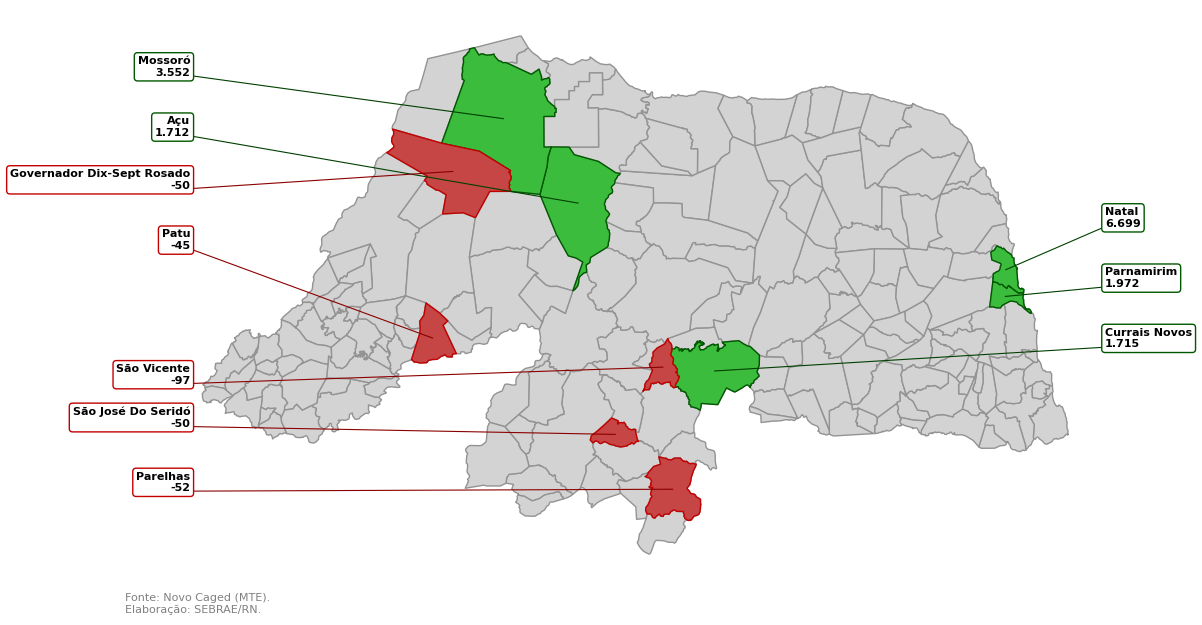

Mapa salvo como: img/mapa_saldo_mpe.png


In [123]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import geobr
from datetime import datetime

# Garantir que a coluna 'data' esteja no formato datetime
mpe['data'] = pd.to_datetime(mpe['data'], errors='coerce')

# Filtrar os dados apenas do ano mais recente
ano_atual = mpe['data'].dt.year.max()
mpe_ano_atual = mpe[mpe['data'].dt.year == ano_atual]

municipios = (mpe_ano_atual.groupby("município", as_index=False)
    .agg(Saldo=("saldomovimentação", "sum")))

# Adicionar colunas de ranking
municipios["top5"] = municipios["Saldo"].rank(method="min", ascending=False).isin(range(1, 6))
municipios["bottom5"] = municipios["Saldo"].rank(method="min").isin(range(1, 6))
municipios = municipios.rename(columns={"município": "code_muni"})

# Carregar o mapa dos municípios do RN
rn_map = geobr.read_municipality(code_muni="RN")
rn_map['code_muni'] = rn_map['code_muni'].astype(str)
rn_map["code_muni"] = rn_map["code_muni"].str[:-3]

# Garantir que ambos sejam strings
rn_map['code_muni'] = rn_map['code_muni'].astype(str)
municipios['code_muni'] = municipios['code_muni'].astype(str)

# Mesclar os dados do saldo com o mapa
map_saldo = pd.merge(rn_map, municipios, on='code_muni', how='outer')

# Formatar a coluna 'Saldo' no formato brasileiro
map_saldo['Saldo'] = map_saldo['Saldo'].fillna(0).apply(lambda x: f"{int(x):,}".replace(",", "."))

# Criar coluna de rótulo para municípios selecionados
map_saldo["MUN_SALDO"] = map_saldo.apply(lambda x: f"{x['name_muni']}\n{x['Saldo']}" if x["top5"] or x["bottom5"] else None, axis=1)

# Definir cores de preenchimento e borda
fill_palette = ["#3CBC3C", "#C64646", "#d3d3d3"]
border_palette = ["#005800", "#C30000", "#939393"]

map_saldo['fill_colors'] = map_saldo.apply(
    lambda x: fill_palette[0] if x['top5'] else (fill_palette[1] if x['bottom5'] else fill_palette[2]), axis=1
)

map_saldo['border_colors'] = map_saldo.apply(
    lambda x: border_palette[0] if x['top5'] else (border_palette[1] if x['bottom5'] else border_palette[2]), axis=1
)

map_saldo_sf = gpd.GeoDataFrame(map_saldo)

# Filtrar os top 5 e bottom 5
top5 = map_saldo_sf[map_saldo_sf['top5'].fillna(False)]
bottom5 = map_saldo_sf[map_saldo_sf['bottom5'].fillna(False)]

# Função para filtrar espacialmente
def filter_sf(data, xmin=None, xmax=None, ymin=None, ymax=None):
    bbox = box(xmin, ymin, xmax, ymax) if all([xmin, xmax, ymin, ymax]) else None
    if bbox:
        return data[data.intersects(bbox)]
    return data

# Filtragem por posição geográfica
direita = filter_sf(map_saldo_sf, xmin=-36.6)
esquerda = map_saldo_sf[~map_saldo_sf['code_muni'].isin(direita['code_muni'])]

# Cores para os textos
direita['text_colors'] = direita.apply(
    lambda x: "#07ca8d" if x['top5'] else ("#C30000" if x['bottom5'] else None), axis=1
)
esquerda['text_colors'] = esquerda.apply(
    lambda x: "#07ca8d" if x['top5'] else ("#C30000" if x['bottom5'] else None), axis=1
)

# Converter para CRS projetado
map_saldo_sf = map_saldo_sf.to_crs(epsg=3857)
top5 = top5.to_crs(epsg=3857)
bottom5 = bottom5.to_crs(epsg=3857)

# Calcular a longitude central do mapa
x_center = map_saldo_sf.geometry.centroid.x.mean()

# Adicionar coordenada y do centróide
top5["centroid_y"] = top5.geometry.centroid.y
bottom5["centroid_y"] = bottom5.geometry.centroid.y

# Separar top5 e bottom5 entre esquerda e direita
top5_direita = top5[top5.geometry.centroid.x > x_center].sort_values(by="centroid_y", ascending=False)
top5_esquerda = top5[top5.geometry.centroid.x <= x_center].sort_values(by="centroid_y", ascending=False)
bottom5_direita = bottom5[bottom5.geometry.centroid.x > x_center].sort_values(by="centroid_y", ascending=False)
bottom5_esquerda = bottom5[bottom5.geometry.centroid.x <= x_center].sort_values(by="centroid_y", ascending=False)

# Cores ajustadas
fill_colors = {"bottom5": "#C64646", "top5": "#3CBC3C"}
border_colors = {"top5": "#005800", "bottom5": "#C30000"}
darker_colors = {"top5": "#004000", "bottom5": "#8B0000"}

used_positions_right = []
used_positions_left = []

def find_non_overlapping_position(base_y, used_positions, step=16000):
    y = base_y
    for _ in range(1000):
        if all(abs(y - used_y) > step for used_y in used_positions):
            used_positions.append(y)
            return y
        y -= step
    return y

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 6))
map_saldo_sf.plot(ax=ax, color="#d3d3d3", edgecolor="#939393", label="Outros Municípios")
top5.plot(ax=ax, color=fill_colors["top5"], edgecolor=border_colors["top5"], label="Top 5")
bottom5.plot(ax=ax, color=fill_colors["bottom5"], edgecolor=border_colors["bottom5"], label="Bottom 5")

def annotate_cities(df, side, line_color, box_color, x_offset):
    base_y = df["centroid_y"].max() + 20000
    used_positions = used_positions_right if side == "right" else used_positions_left

    # Dicionário com as posições fixas para os municípios específicos
    fixed_positions = {
        "São Vicente": -700000,
        "Parelhas": -750000,
        "São José Do Seridó": -720000,
    }

    for _, row in df.iterrows():
        centroid = row.geometry.centroid
        
        municipio_nome = row["name_muni"]  # Nome do município
        print(f"Verificando município: {municipio_nome}")  # Debug
        
        # Verificar se o município é um dos específicos e definir a posição fixa de y
        if municipio_nome in fixed_positions:
            print(f"Municipio {municipio_nome} encontrado, posição Y fixada em {fixed_positions[municipio_nome]}")  # Debug
            y = fixed_positions[municipio_nome]
        else:
            # Para os outros municípios, encontrar uma posição y não sobreposta
            y = find_non_overlapping_position(base_y, used_positions, step=14000)
            base_y = y

        # Definir a posição de x dependendo do lado (direita ou esquerda)
        text_x = x_center + x_offset if side == "right" else x_center - x_offset

        # Plotar a linha entre o centroide e a posição do texto
        ax.plot([centroid.x, text_x], [centroid.y, y], "-", color=line_color, lw=0.8)
        
        # Adicionar o texto do saldo no município
        ax.text(
            text_x, y, row["MUN_SALDO"],
            fontsize=8, ha="left" if side == "right" else "right",
            weight="bold",
            bbox=dict(facecolor="white", edgecolor=box_color, boxstyle="round,pad=0.3")
        )

# Anotar cidades
annotate_cities(top5_direita, "right", darker_colors["top5"], border_colors["top5"], 200000)
annotate_cities(bottom5_direita, "right", darker_colors["bottom5"], border_colors["bottom5"], 200000)
annotate_cities(top5_esquerda, "left", darker_colors["top5"], border_colors["top5"], 225000)
annotate_cities(bottom5_esquerda, "left", darker_colors["bottom5"], border_colors["bottom5"], 225000)

# Ajustes finais
ax.set_title("")
ax.axis("off")

# Adicionar informações de fonte e elaboração
plt.figtext(0.1, -0.01, 'Fonte: Novo Caged (MTE).',
            ha='left', fontsize=8, color='gray', weight='normal')
plt.figtext(0.1, -0.03, 'Elaboração: SEBRAE/RN.',
            ha='left', fontsize=8, color='gray', weight='normal')

plt.tight_layout()

# Salvar o mapa antes de exibi-lo
output_path = "img/mapa_saldo_mpe.png"
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight", transparent=True)

# Mostrar o gráfico
plt.show()

print(f"Mapa salvo como: {output_path}")

## PDF

In [124]:
# Função para converter a imagem em Base64 (para embutir no HTML)
def imagem_para_base64(caminho_imagem):
    with open(caminho_imagem, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

# Função para gerar o conteúdo HTML
def gerar_html(admissoes, saldo, desligamentos, estoque_clt):
    grafico_acumulado_ano_e_mpe ='img/grafico_acumulado_ano_e_mpe.png'
    grafico_acumulado_setor_2024 = 'img/grafico_acumulado_setor_2024.png'
    grafico_acumulado_porte ='img/grafico_acumulado_porte_2024.png'
    mapa_saldo_acumulado = 'img/mapa_saldo_acumulado.png'
    mapa_saldo_mpe ='img/mapa_saldo_mpe.png'
    saldo_acumulado_estado = 'img/grafico_acumulado_estado_2024.png'

    # Converter a imagem de cabeçalho em base64
    header_image_base64 = imagem_para_base64('img\header-emprego.png')

    # Converter o gráfico em base64
    grafico_acumulado_ano_e_mpe_b64 = imagem_para_base64(grafico_acumulado_ano_e_mpe)
    grafico_acumulado_setor_2024_b64 = imagem_para_base64(grafico_acumulado_setor_2024)
    grafico_acumulado_porte_b64 = imagem_para_base64(grafico_acumulado_porte)
    mapa_saldo_acumulado_b64 = imagem_para_base64(mapa_saldo_acumulado)
    mapa_saldo_mpe_b64 = imagem_para_base64(mapa_saldo_mpe)
    saldo_acumulado_estado_b64 = imagem_para_base64(saldo_acumulado_estado)

    # Criar conteúdo HTML
    html_content = f"""
    <!DOCTYPE html>
    <html lang="pt-br">
    <head>
        <meta charset="UTF-8">
        <title>Boletim de Emprego</title>
        <style>
            @page {{
                size: 1080px 720px;
                margin: 0;
            }}

            /* Definir o fundo da página */
            body {{
                background-color: #f3f3f3; /* Cor de fundo */
                font-family: Arial, sans-serif;
                margin: 0;
                padding: 0;
            }}
            header {{
                background-image: url('data:image/png;base64,{header_image_base64}');
                background-repeat: no-repeat;
                background-size: 100% 100%;
                background-position: center;
                height: 360px;
                text-align: center;
                color: white;
                font-size: 24px;
                display: flex;
                align-items: center;
                justify-content: center;
            }}
                .mes {{
                font-size: 24px;
                font-weight: bold;
                color: #333;
                text-align: center;
                margin-top: 30px;
            }}

            /* Estilo para as caixinhas */
            .informacoes {{
                display: flex;
                justify-content: space-evenly; /* Distribui as caixinhas uniformemente */
                align-items: stretch; /* Mantém todas com a mesma altura */
                padding: 2px;
                margin: 2px 20px;
                gap: 20px; /* Espaçamento entre as caixinhas */
            }}
            .caixinha {{
                background-color: #fff;*
                border: 1px solid #ddd;
                padding: 2px;
                text-align: center;
                width: 22%;
                border-radius: 10px;
                box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);

                /* Centralização vertical */
                display: flex;
                flex-direction: column;
                justify-content: center;
                align-items: center;

                /* Definir uma altura fixa para todas */
                min-height: 20px;
                padding-bottom: 20px;
                margin-top: 20px;
            }}
            .caixinha h3 {{
                font-size: 20px;
                color: #1574bc;
                margin-bottom: 2px;
            }}
            .caixinha p {{
                font-size: 24px;
                font-weight: bold;
                color: #333;
                margin: 2px 0;
            }}
            .grafico h3 {{
                font-size: 24px;
                font-weight: bold;
                color: #333;
                text-align: center;
                padding-top: 60px;
            }}
            .grafico h2 {{
                padding-top= -15px;
                font-size: 18px;
                color: #333;
                text-align: center;
                font-weight: normal;
            }}

            .grafico img {{
                width: 1000px;
                padding-top: 20px;
                padding-left: 30px;
            }}

            .tabela {{
                width: 100%;
                border-collapse: collapse;
                margin-top: 20px;
            }}
            th, td {{
                padding: 10px;
                text-align: center;
                border: 1px solid #ddd;
            }}
            th {{
                background-color: #333;
                color: white;
            }}
            td {{
                background-color: #fff;
            }}
            footer {{
                text-align: center;
                font-size: 12px;
                margin-top: 30px;
            }}

            .nota-rodape {{
    text-align: center;
    font-size: 14px;
    color: gray;
    margin-top: 10px;
    font-style: italic;
}}
        </style>
    </head>
    <body>
        <header>
        </header>

        <!-- Seção do título do ano -->
        <div class="mes">{ano_atual} - Rio Grande do Norte</div>

        <!-- Seção das Caixinhas -->
        <div class="informacoes">
            <div class="caixinha">
                <h3>Admissões</h3>
                <p>{total_admissoes}</p>
                <h3>Admissões MPE</h3>
                <p>{total_admissoes_mpe}</p>
            </div>
            <div class="caixinha">
                <h3>Desligamentos</h3>
                <p>{total_desligamentos}</p>
                <h3>Desligamentos MPE</h3>
                <p>{total_desligamentos_mpe}</p>
            </div>

                        <div class="caixinha">
                <h3>Saldo</h3>
                <p>{saldo}</p>
                <h3>Saldo MPE</h3>
                <p>{saldo_mpe}</p>
            </div>

            <div class="caixinha">
                <h3>Estoque CLT</h3>
                <p>{estoque_clt}</p>
            </div>
        </div>

        <!-- Nota de Rodapé "MPE: Micro e Pequenas Empresas" -->
<div class="nota-rodape">
    MPE: Micro e Pequenas Empresas
</div>

        <div class="grafico">
            <h3>Saldo de Emprego por Ano - Rio Grande do Norte</h3>
            <img src="data:image/png;base64,{grafico_acumulado_ano_e_mpe_b64}">
        </div>

                <div class="grafico">
            <h3>Saldo de Emprego por Setor em {ano_atual} - Rio Grande do Norte</h3>
            <img src="data:image/png;base64,{grafico_acumulado_setor_2024_b64}">
        </div>

                <div class="grafico">
            <h3>Saldo de Emprego Acumulado por Porte em {ano_atual} - Rio Grande do Norte</h3>
            <img src="data:image/png;base64,{grafico_acumulado_porte_b64}">
        </div>

                <div class="grafico">
            <h3>Mapa de Emprego Acumulado em {ano_atual} - Rio Grande do Norte</h3>
            <img src="data:image/png;base64,{mapa_saldo_acumulado_b64}">
        </div>
                <div class="grafico">
            <h3>Mapa de Emprego Acumulado em {ano_atual} das MPE - Rio Grande do Norte</h3>
            <img src="data:image/png;base64,{mapa_saldo_mpe_b64}">
        </div>

                <div class="grafico">
            <h3>Saldo de Emprego Acumulado por Estado em {ano_atual} - Nordeste</h3>
            <img src="data:image/png;base64,{saldo_acumulado_estado_b64}">
        </div>

        </div>
    </body>
    </html>
    """

    return html_content

def gerar_pdf(html_content, file_path):
  weasyprint.HTML(string=html_content).write_pdf(file_path)

# Gerar HTML com os valores das variáveis
html_content = gerar_html(total_admissoes, saldo, total_desligamentos, estoque)

# Gerar o PDF
gerar_pdf(html_content, f"pdfs/boletim_emprego_{ano_atual}.pdf")

<>:16: SyntaxWarning: invalid escape sequence '\h'
<>:16: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lhayane.macedo\AppData\Local\Temp\ipykernel_12216\4119586273.py:16: SyntaxWarning: invalid escape sequence '\h'
  header_image_base64 = imagem_para_base64('img\header-emprego.png')
